In [130]:
#this will be for importing libraries/extra packages only
#Some packages are not included in anaconda, so one must manualy import them to the conda environment

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import squarify #this was imported to make treemaps
from wordcloud import WordCloud #to create wordclouds
from scipy.stats import chi2_contingency # chi squared function
from imblearn.over_sampling import SMOTE # package for imbalanced data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from scikeras.wrappers import KerasClassifier
from imblearn.under_sampling import TomekLinks




# Data Exploration

In [131]:
df = pd.read_csv('train.csv')
print(df.describe())
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")



                 ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.746300e+04  67463.000000   67463.000000            67463.000000   
mean   2.562761e+07  16848.902776   15770.599114            14621.799323   
std    2.109155e+07   8367.865726    8150.992662             6785.345170   
min    1.297933e+06   1014.000000    1014.000000             1114.590204   
25%    6.570288e+06  10012.000000    9266.500000             9831.684984   
50%    1.791565e+07  16073.000000   13042.000000            12793.682170   
75%    4.271521e+07  22106.000000   21793.000000            17807.594120   
max    7.224578e+07  35000.000000   34999.000000            34999.746430   

               Term  Interest Rate  Employment Duration  Debit to Income  \
count  67463.000000   67463.000000         67463.000000     67463.000000   
mean      58.173814      11.846258         80541.502522        23.299241   
std        3.327441       3.718629         45029.120366         8.451824   
min       3

In [132]:
#Let's check the ammount of unique values a column can have
#if the unque_values == 1, the column is irrevelant ( novariation -> column does not have an impact on the target variable)
irrelevant_columns = []

irrelevant_columns.append('ID') #ID is just a number that identifies a client, completely irrelevant

for column in df.columns:
    unique_values = df[column].nunique() #if the number of unique values in a column is 1, then that column doesn't affect the target varibale 
    if unique_values <= 1:
        irrelevant_columns.append(column)

print("Irrelevant Columns:", irrelevant_columns)

#Let's drop these columns as they don't serve any purpose, regarding the goal of this project
df = df.drop(irrelevant_columns, axis=1)

Irrelevant Columns: ['ID', 'Payment Plan', 'Accounts Delinquent']


In [133]:
#imprimir algumas informações básicas do dataframe
print(df.columns.to_list())
print(f"Number of columns in the dataset: {len(df.columns.to_list())}")

#descobrir quais as colunas que representam dados numéricos e que colunas representam dados categóricos
# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
print("Numerical columns:", numerical_cols)

# Get categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
print("Categorical columns:", categorical_cols)



#Mortgage e Employment Duration estão trocados


['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade', 'Home Ownership', 'Employment Duration', 'Verification Status', 'Loan Title', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Initial List Status', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Application Type', 'Last week Pay', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']
Number of columns in the dataset: 32
Numerical columns: ['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Employment Duration', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received I

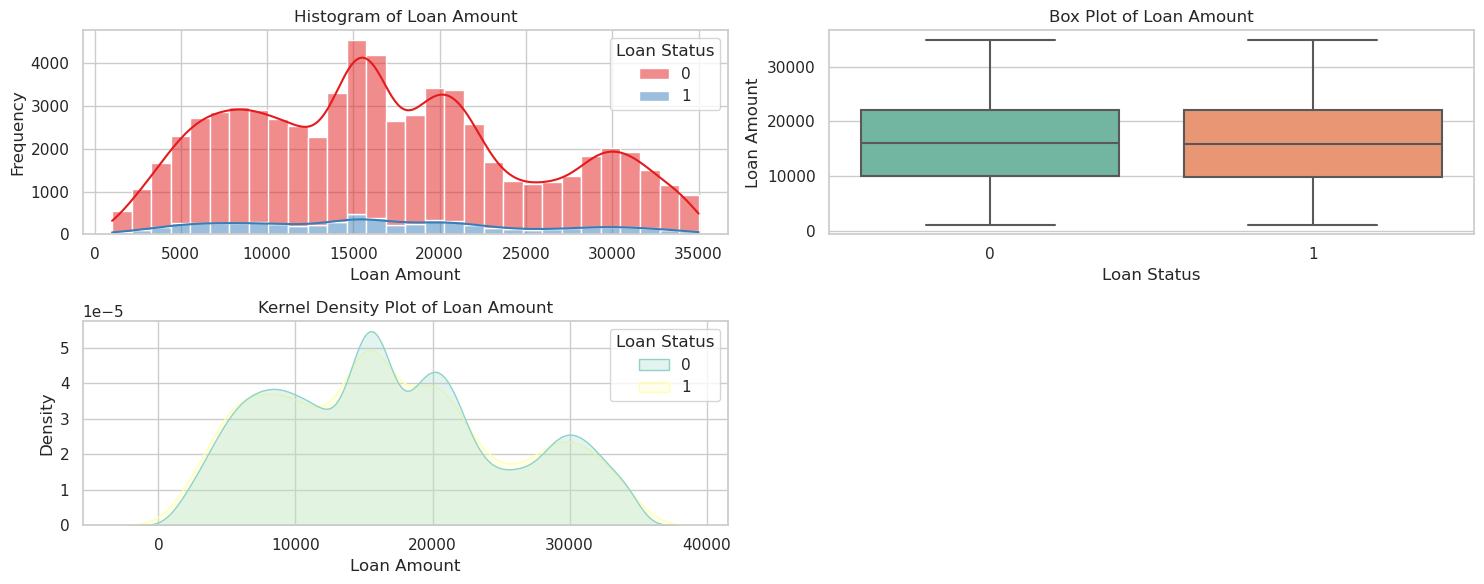

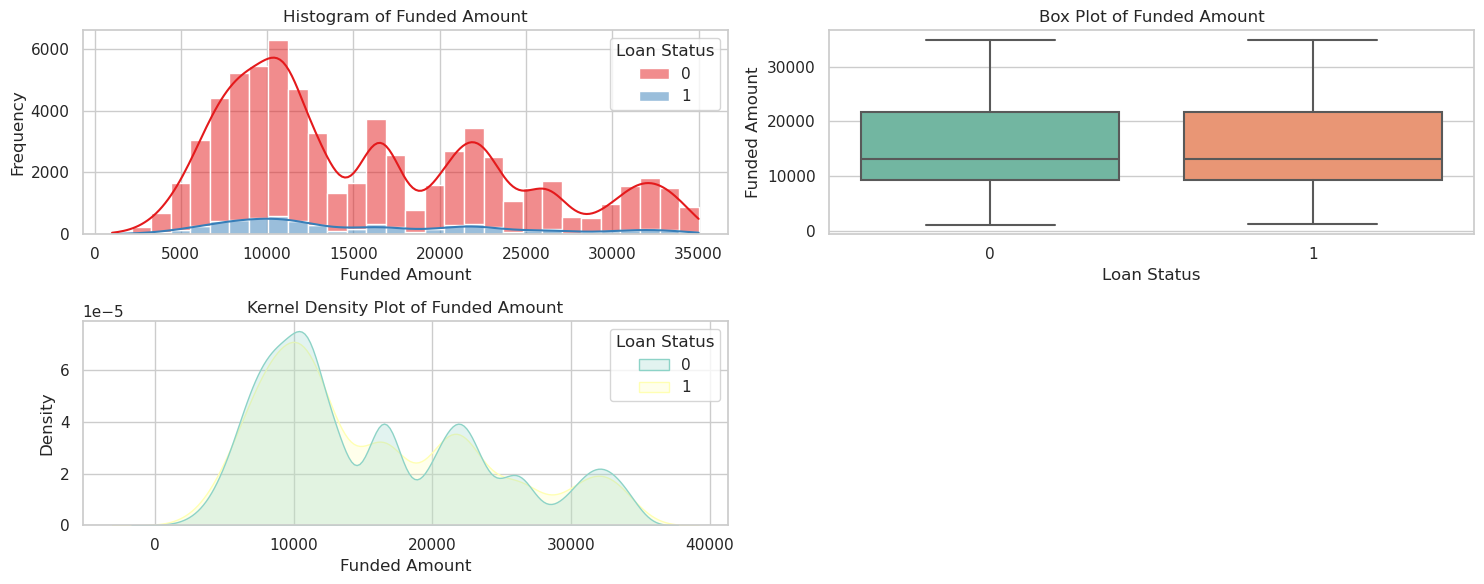

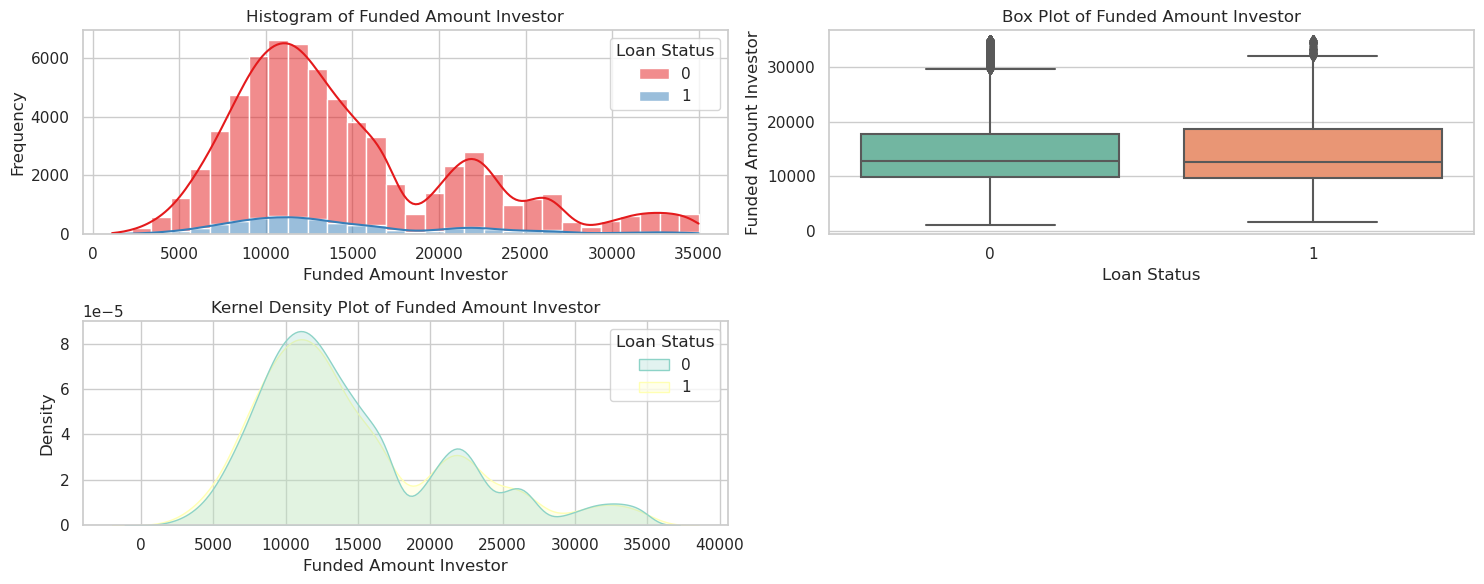

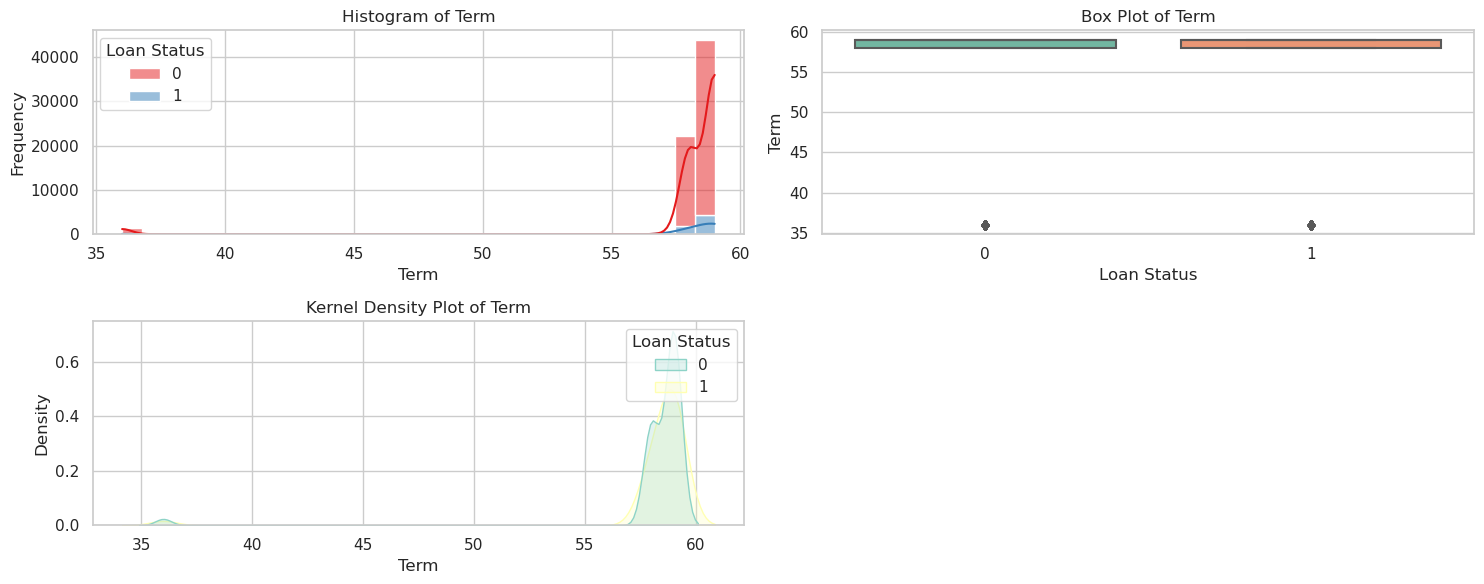

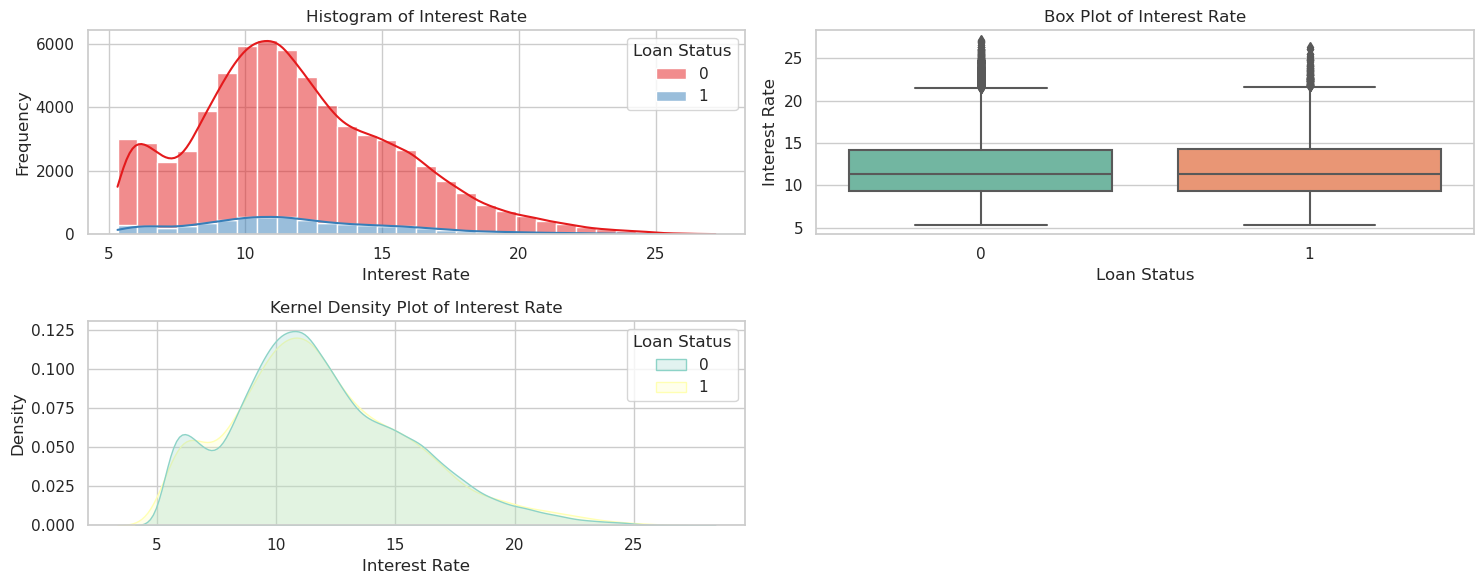

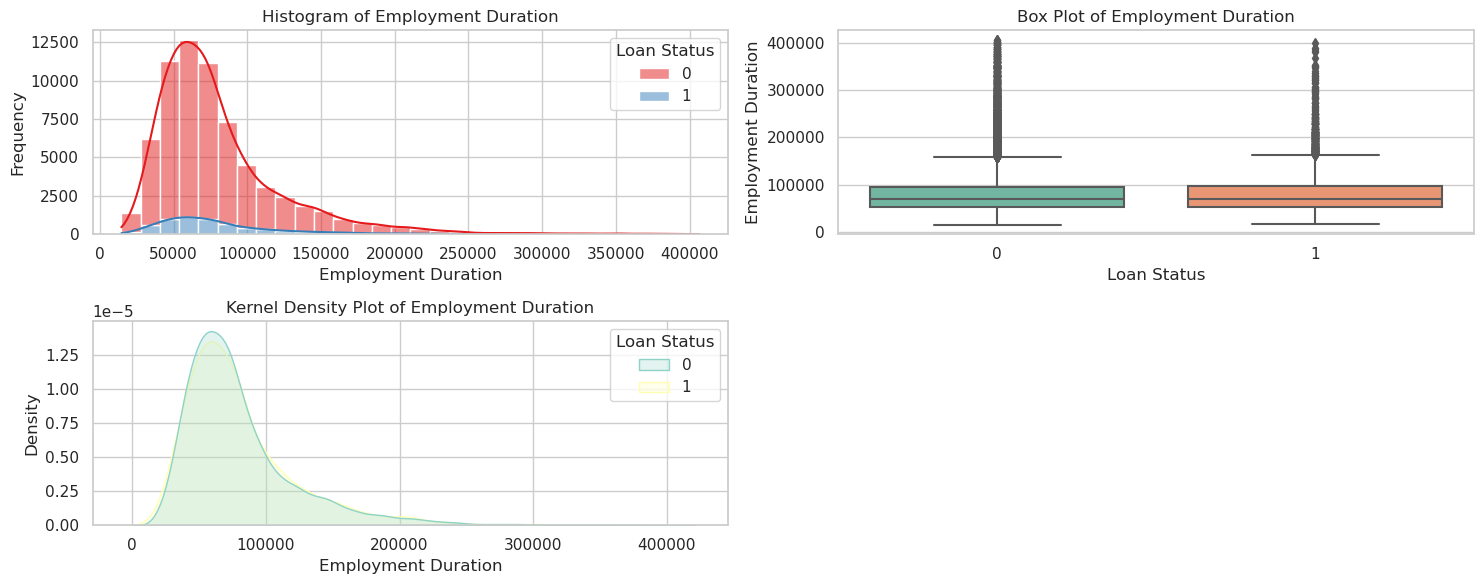

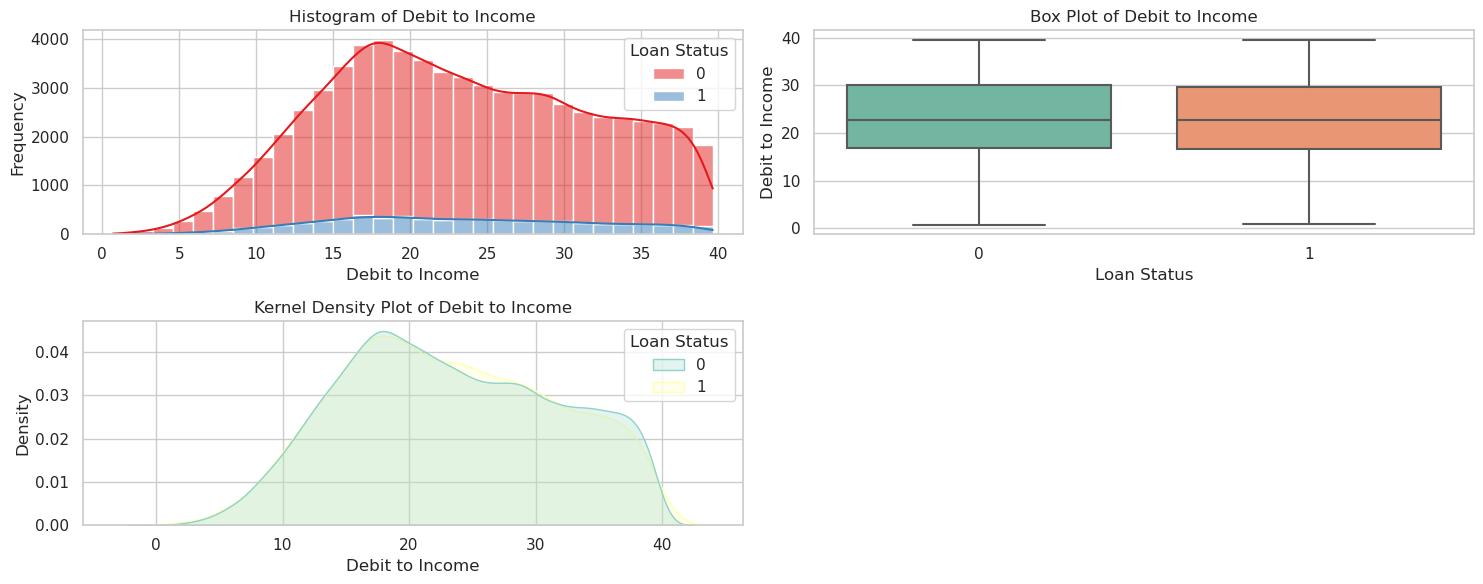

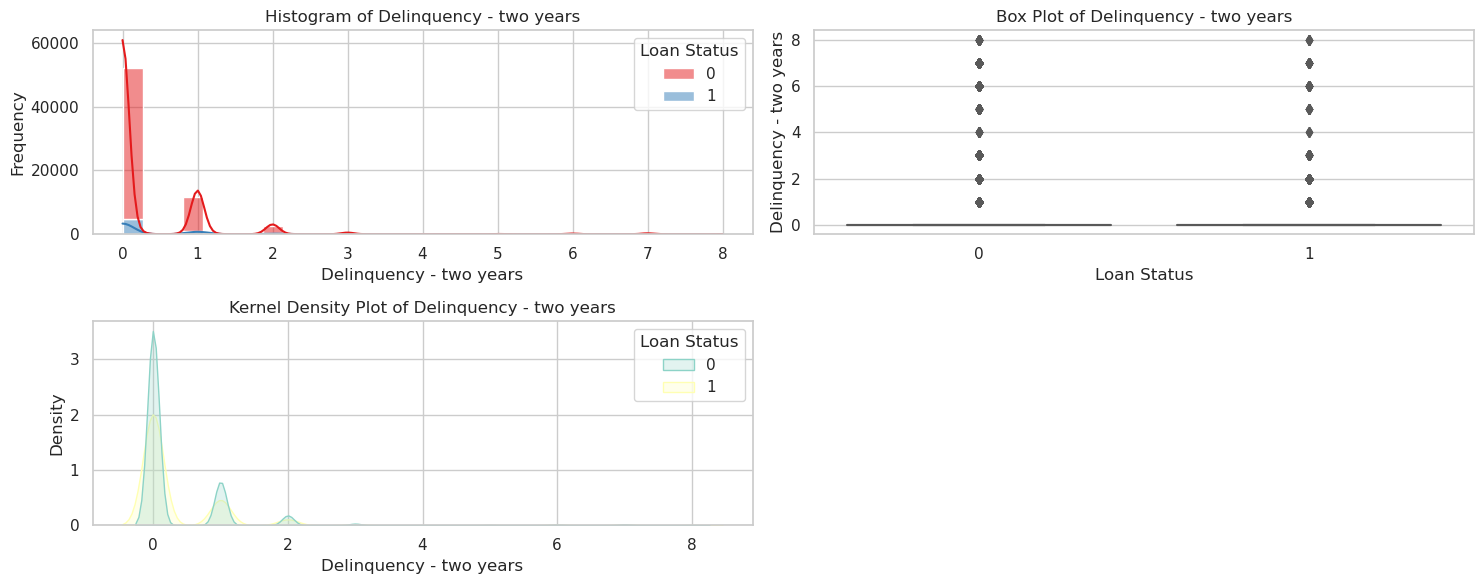

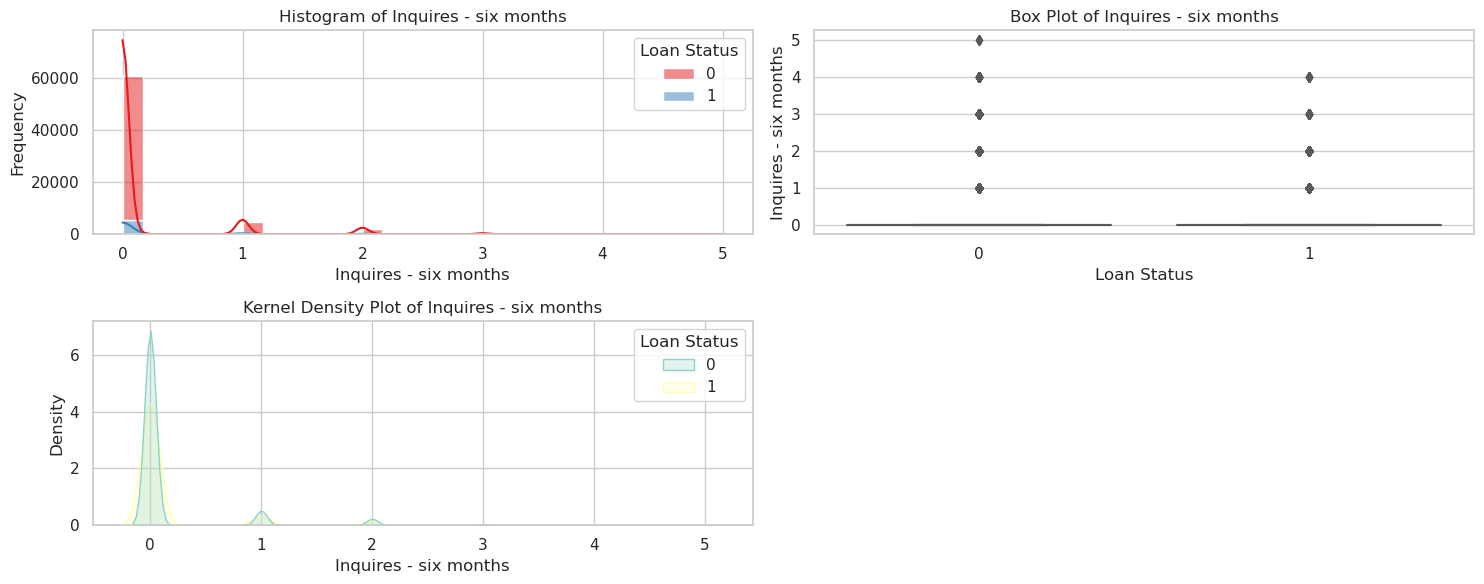

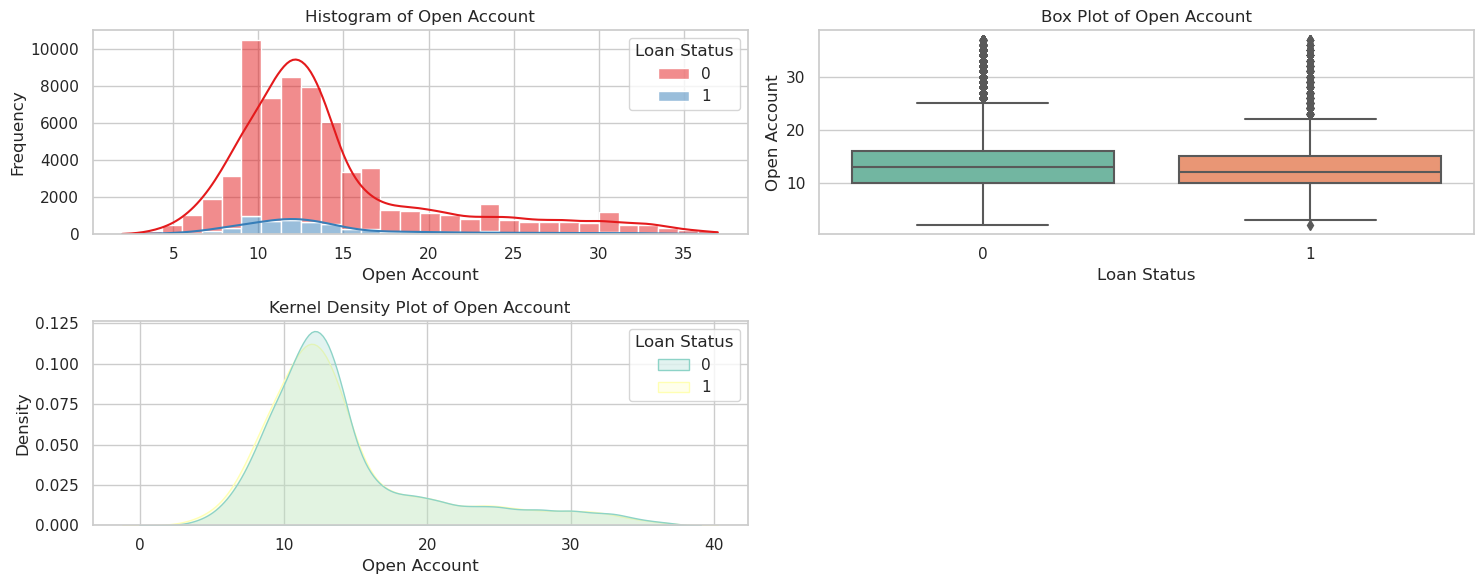

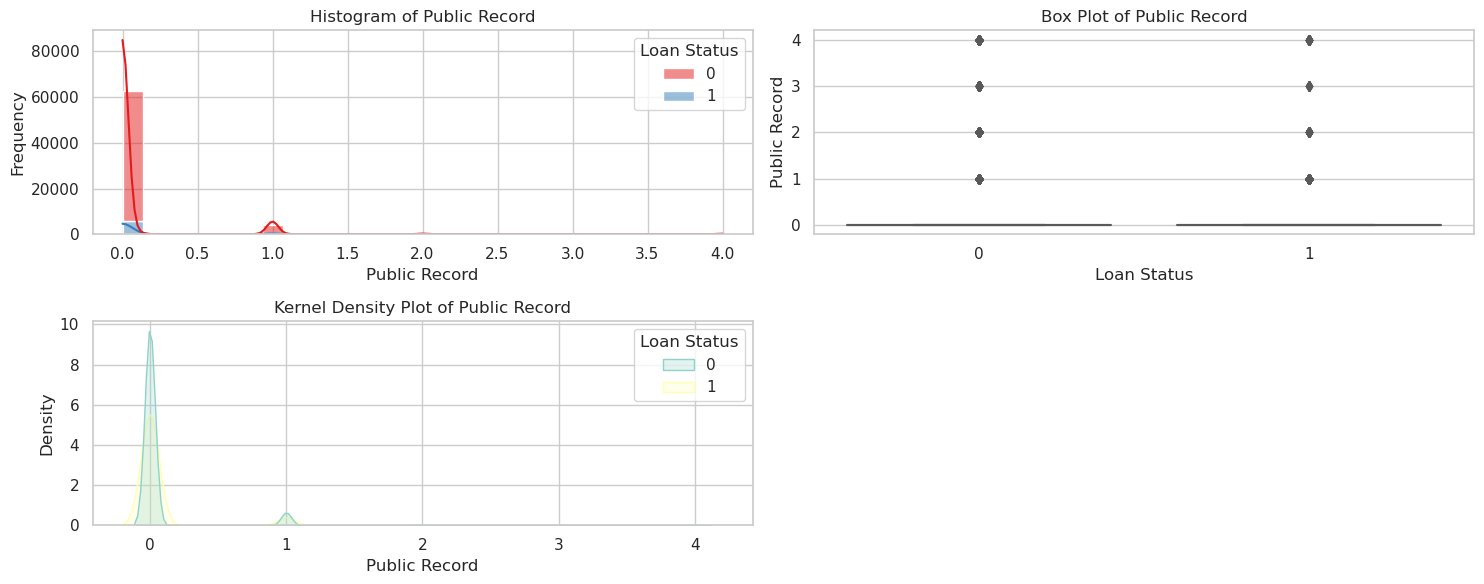

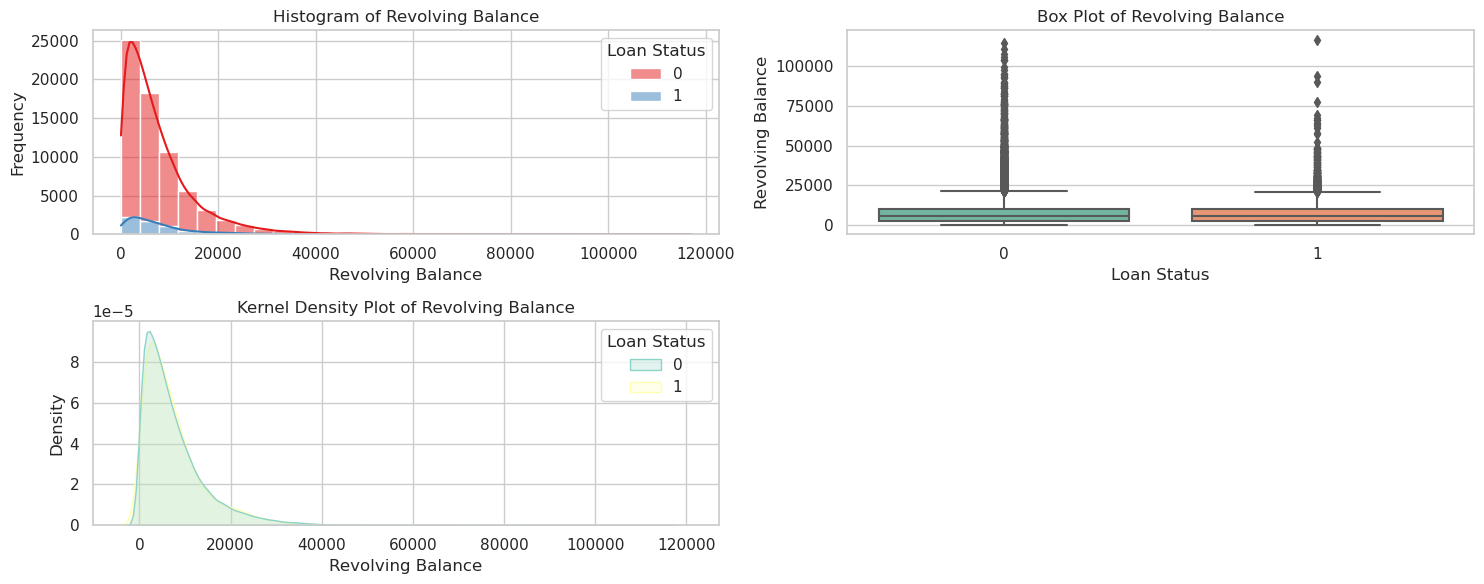

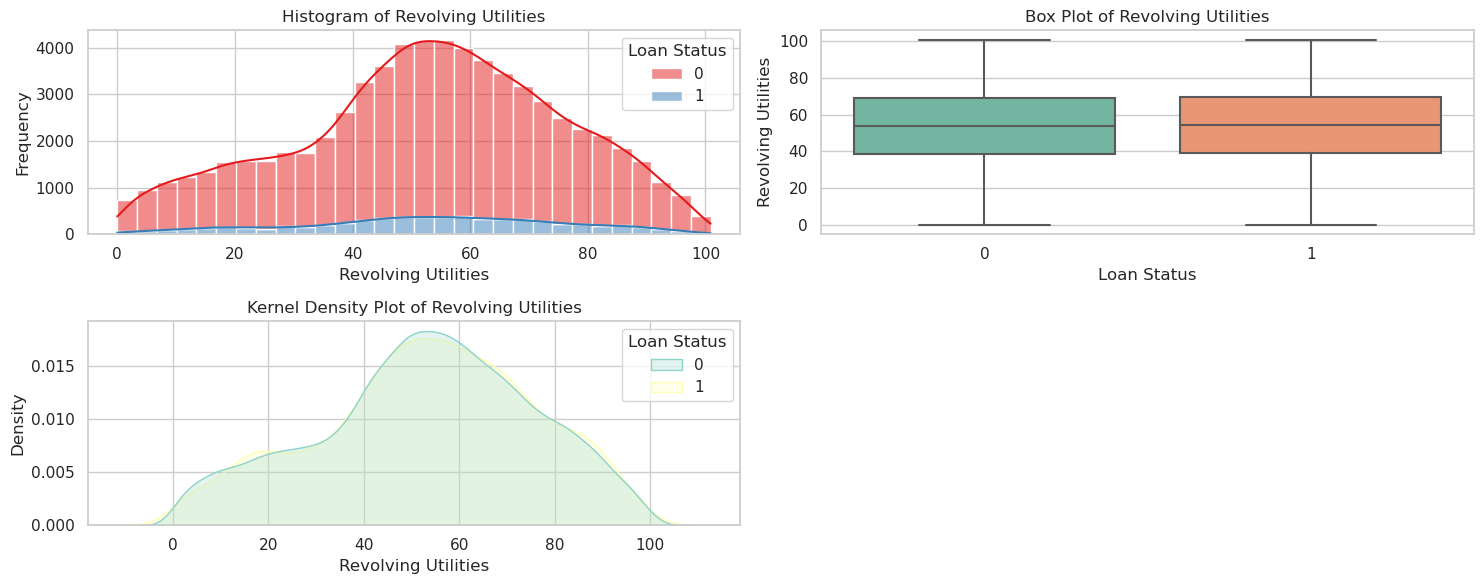

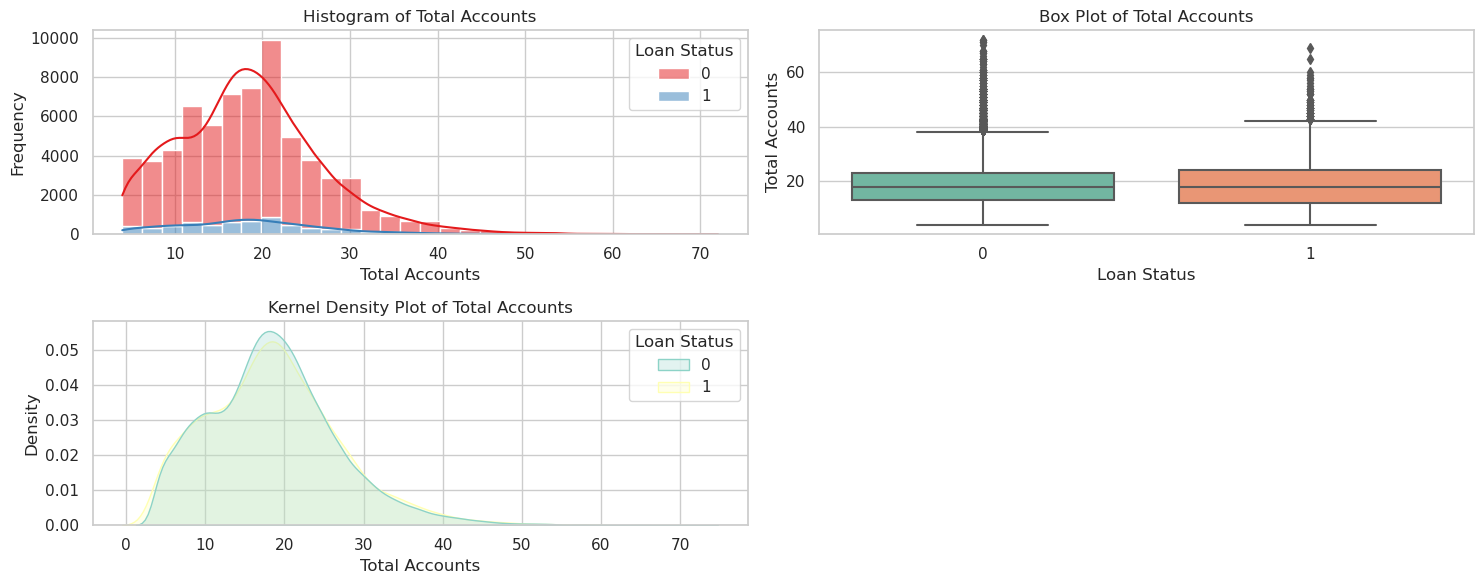

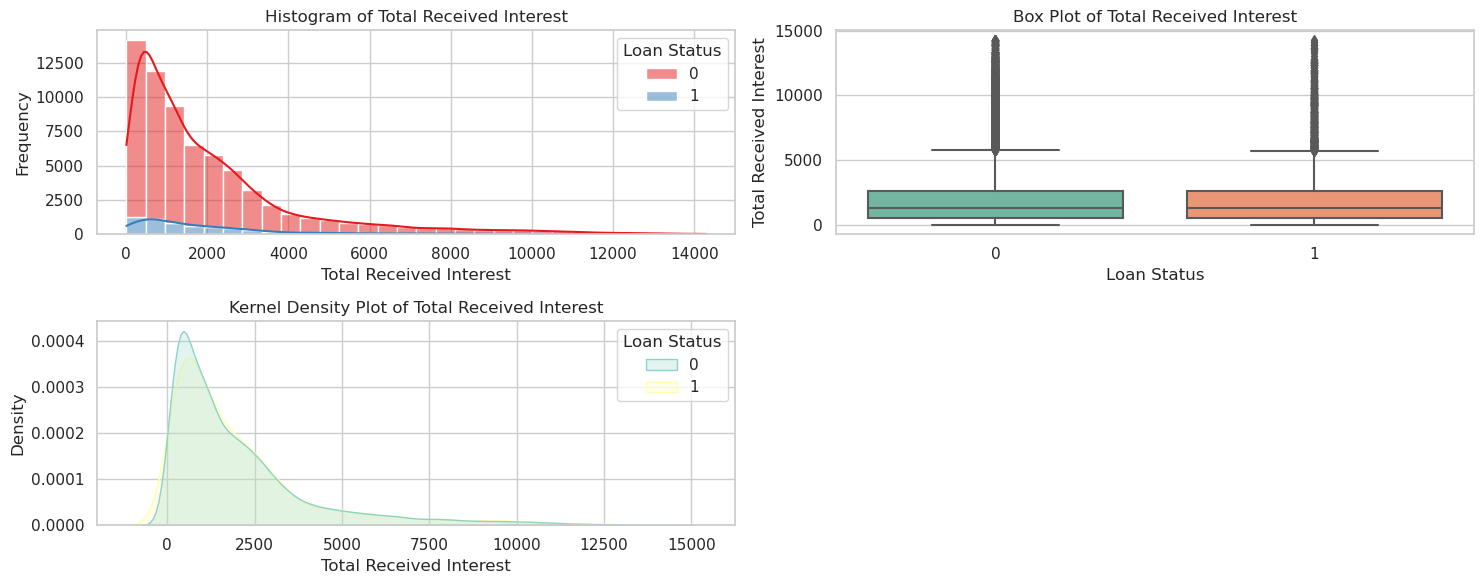

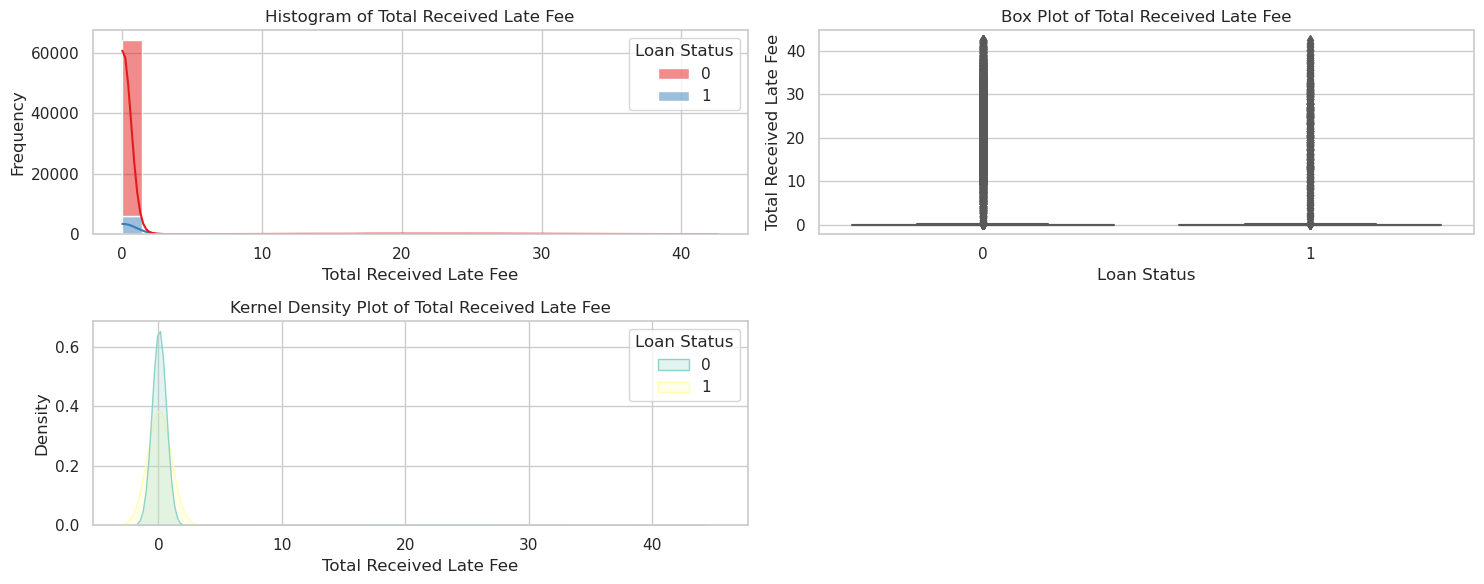

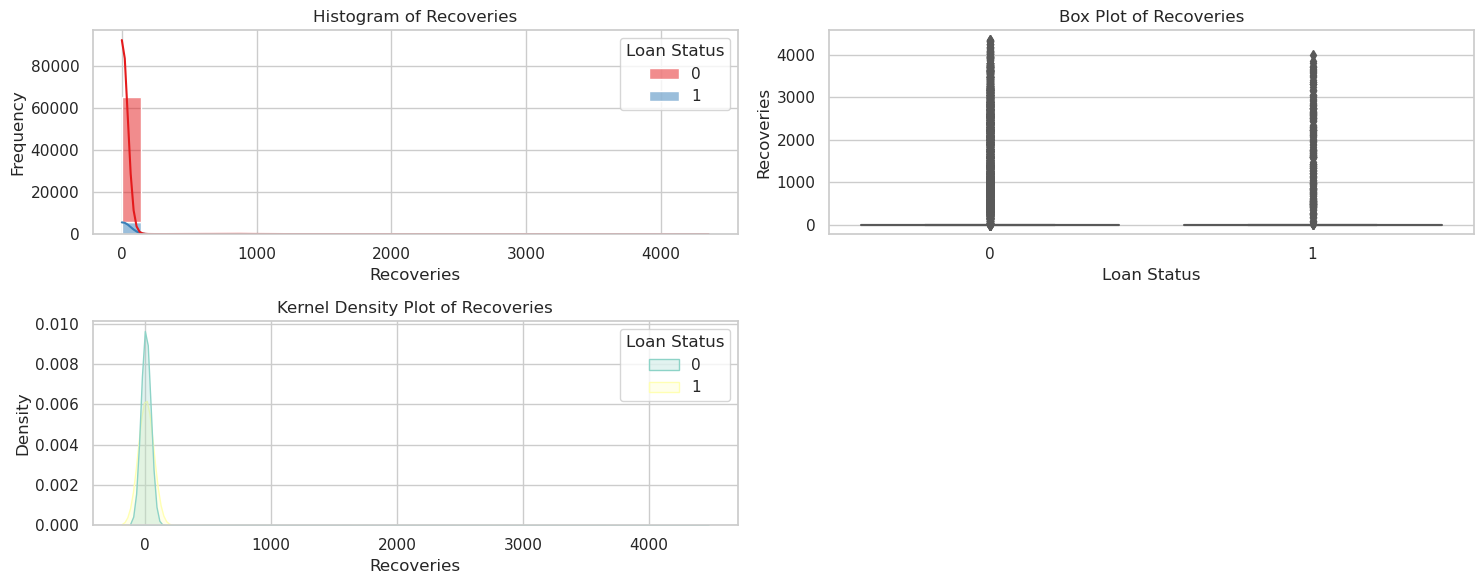

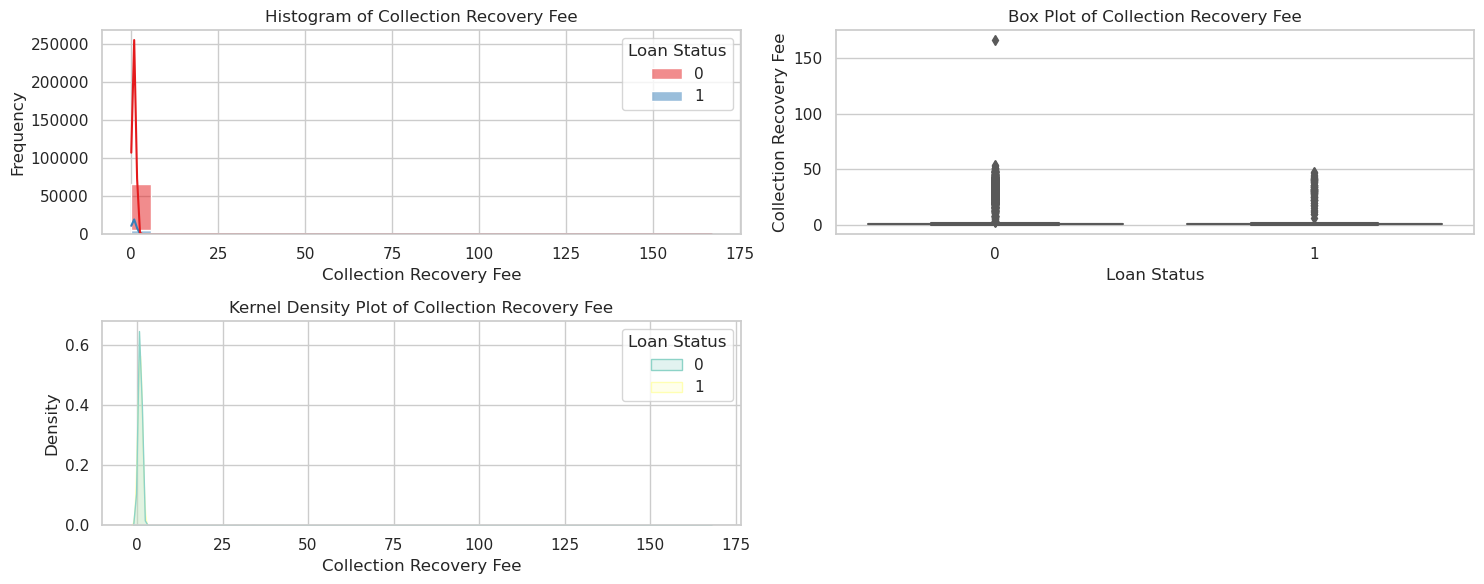

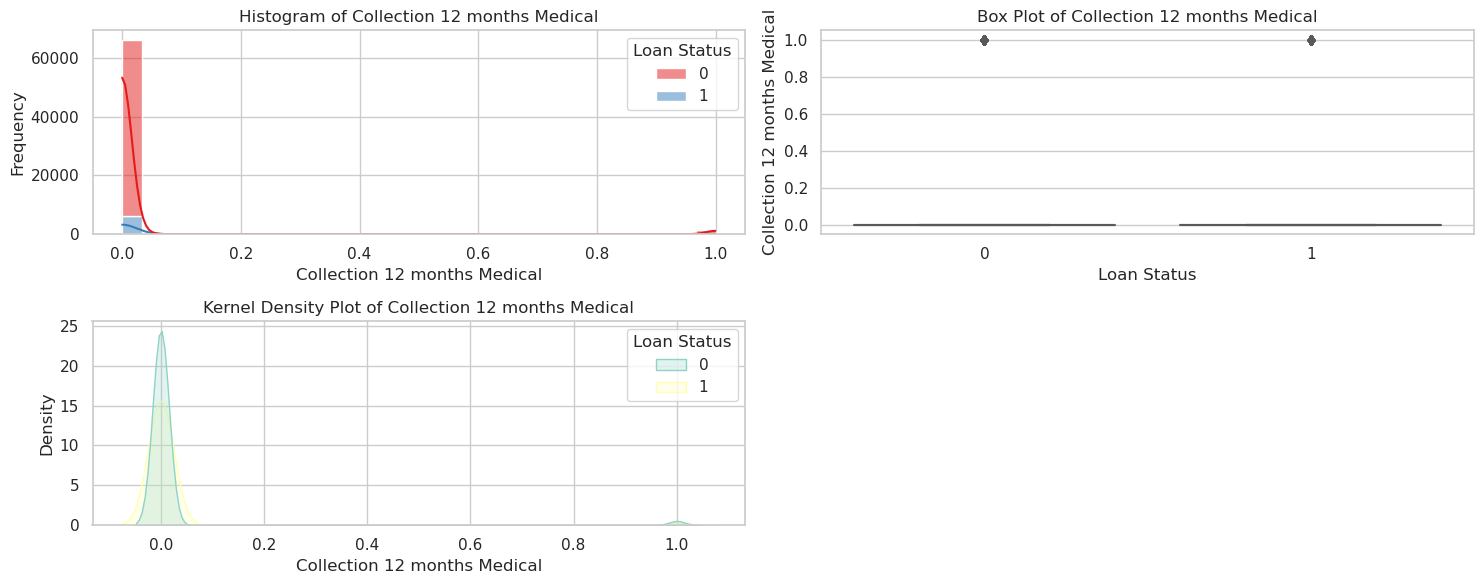

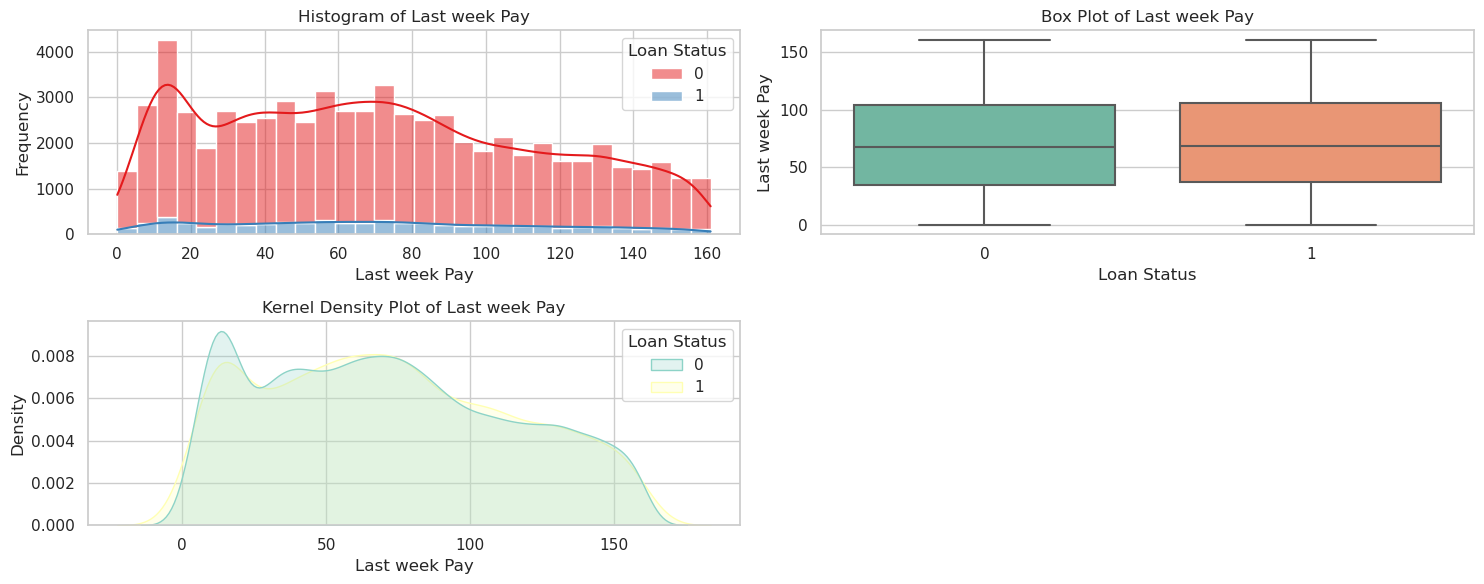

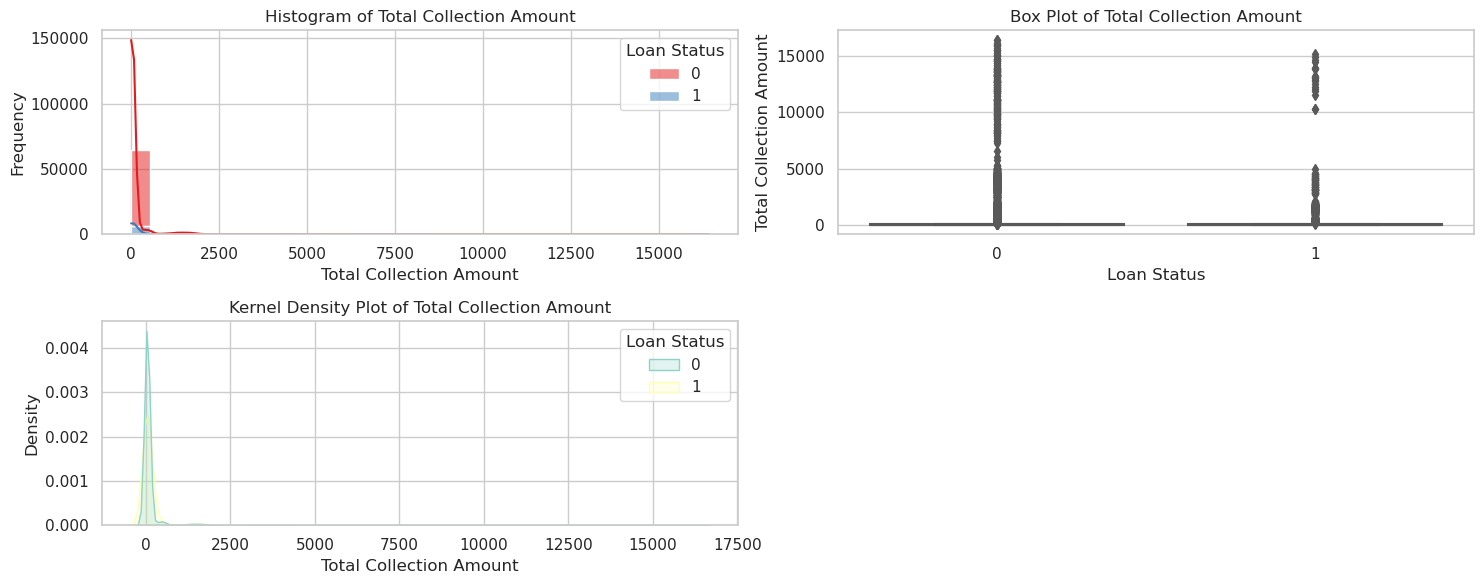

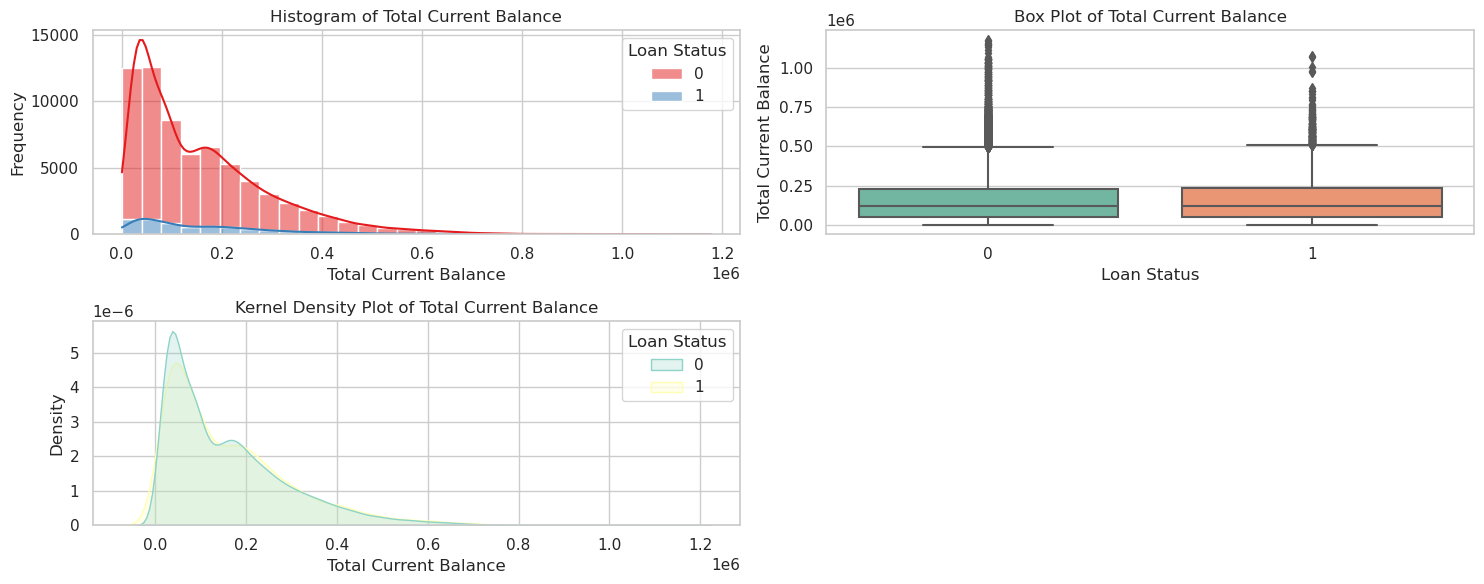

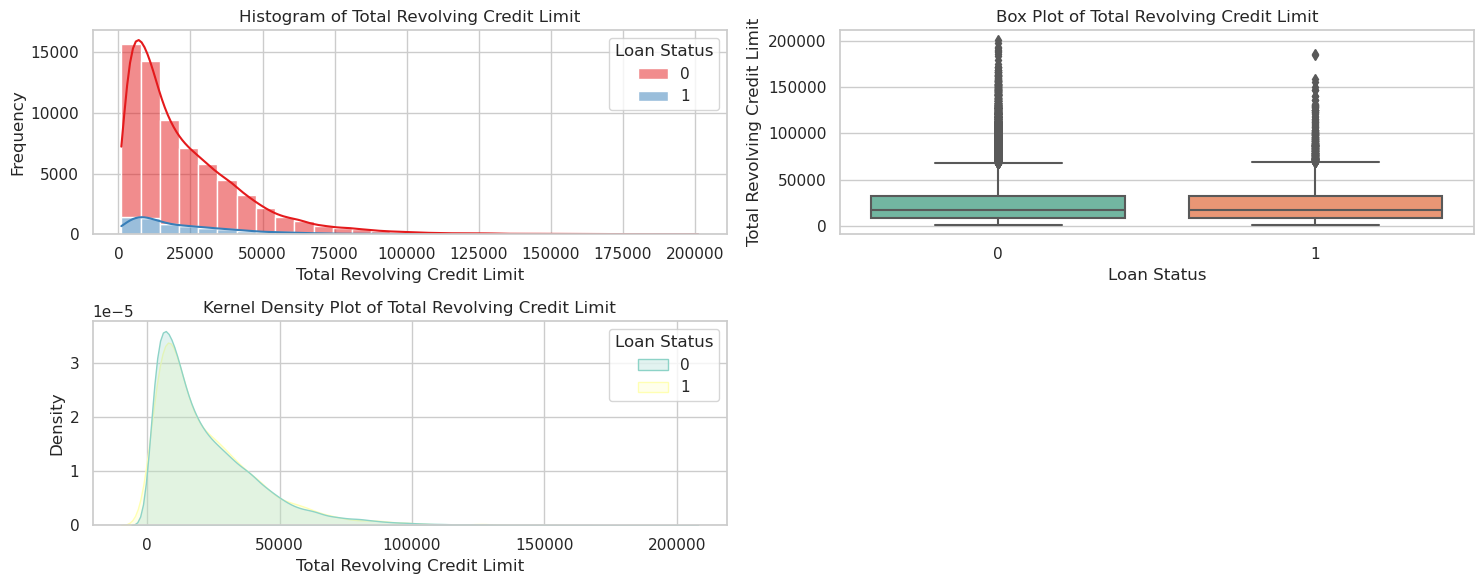

/tmp/ipykernel_12921/2048917735.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=num_var, hue=target_col, fill=True, common_norm=False, palette='Set3')


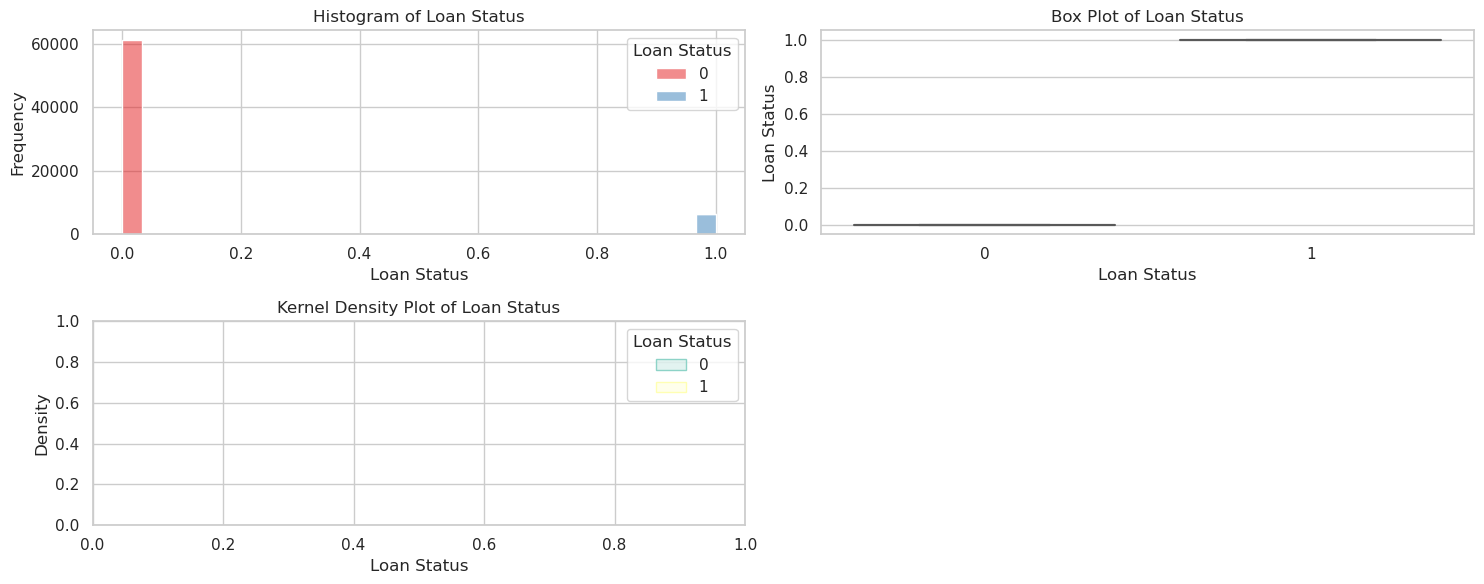

In [134]:
#let's visualize the distribution of the numerical variables
#they have been identified and are in a list


target_col = 'Loan Status'

for num_var in numerical_cols:
    plt.figure(figsize=(15, 6))

    # Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x=num_var, bins=30, hue=target_col, multiple='stack', kde=True, palette='Set1')
    plt.title(f'Histogram of {num_var}')
    plt.xlabel(num_var)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=target_col, y=num_var, data=df, palette='Set2')
    plt.title(f'Box Plot of {num_var}')

    # Kernel Density Plot
    plt.subplot(2, 2, 3)
    sns.kdeplot(data=df, x=num_var, hue=target_col, fill=True, common_norm=False, palette='Set3')
    plt.title(f'Kernel Density Plot of {num_var}')
    plt.xlabel(num_var)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()


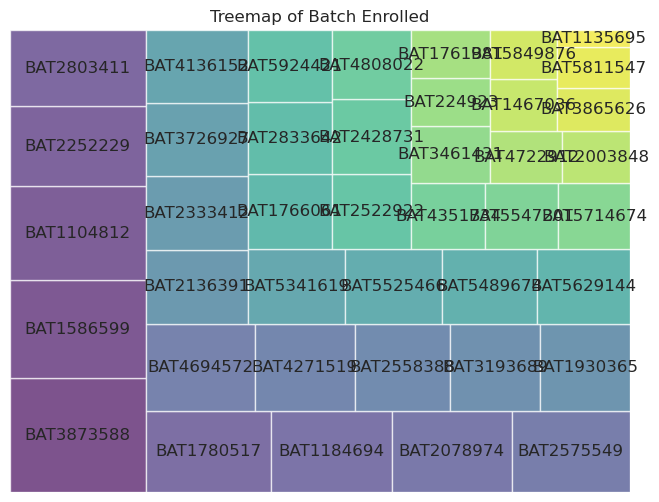

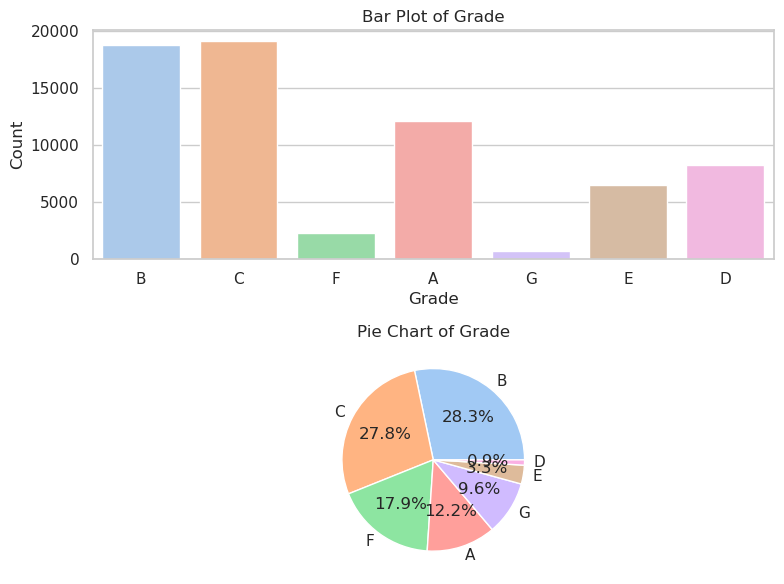

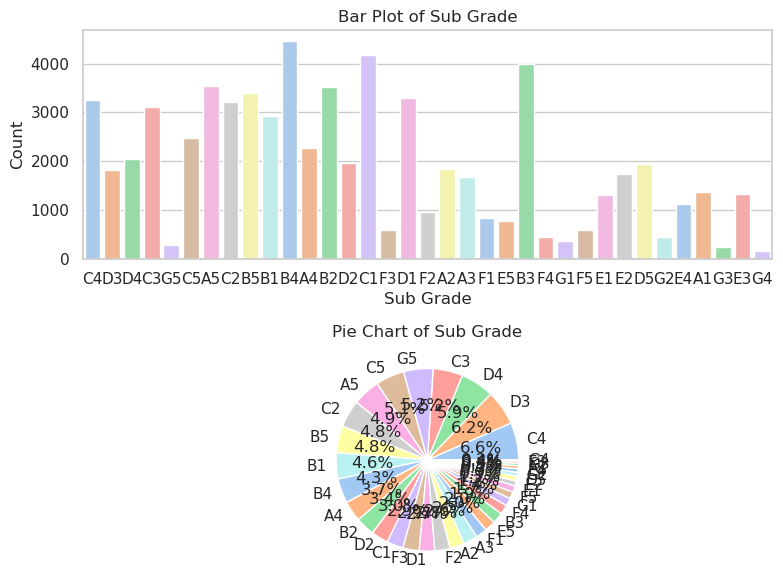

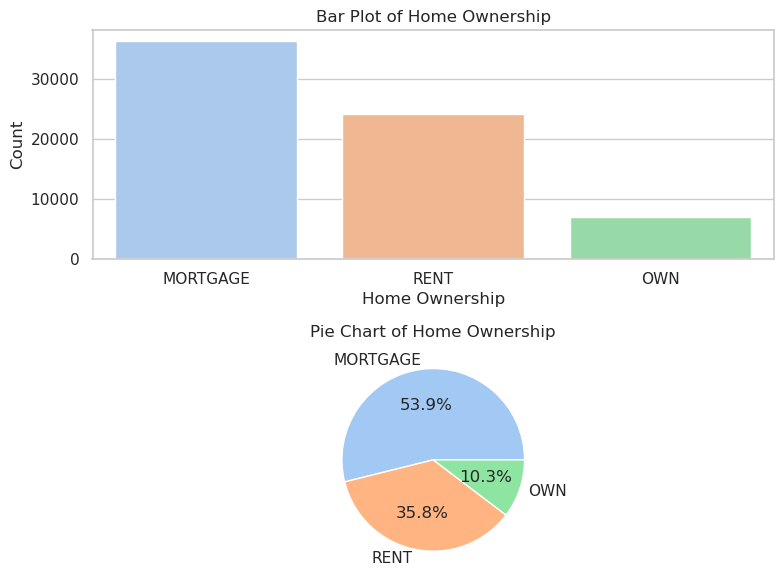

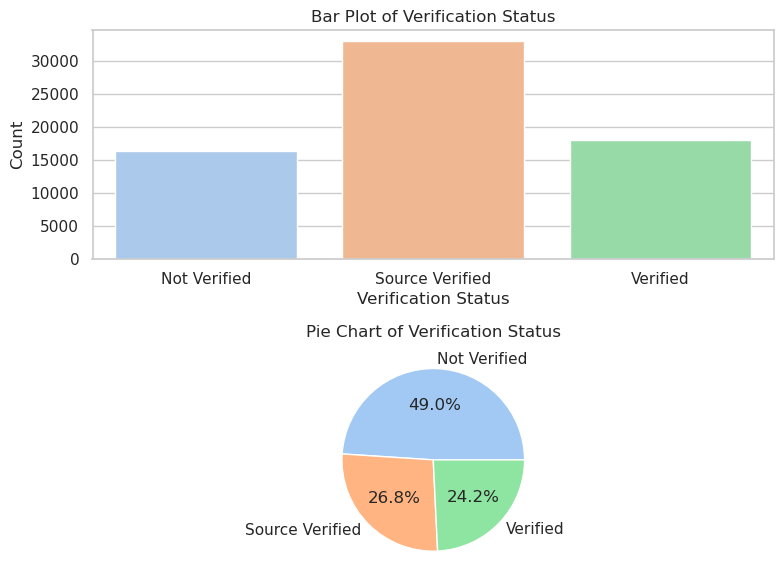

<Figure size 800x600 with 0 Axes>

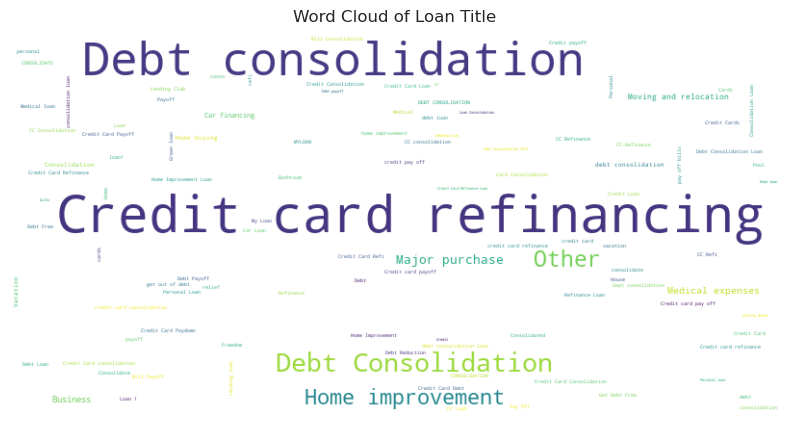

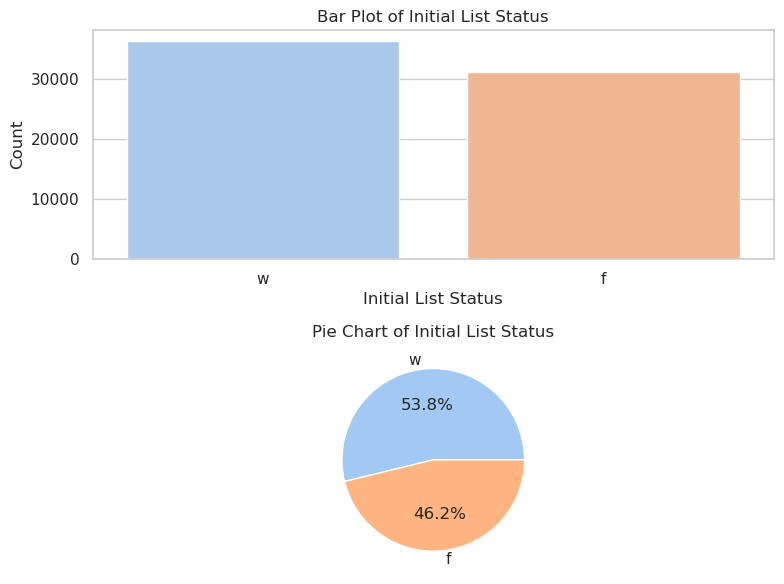

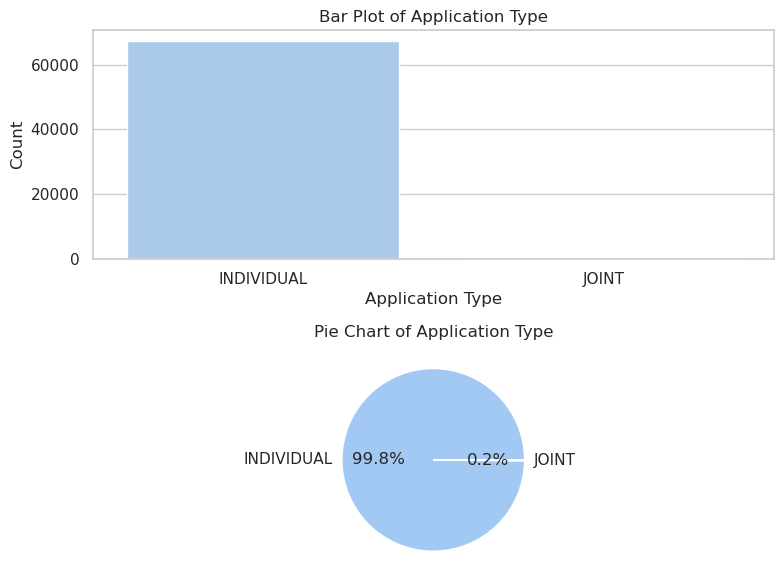

In [135]:
# Let's explore the distribution of categorical variables
#I have automated the way i plot each avriable, and will fix/plot differently if some are not appropriate
#After seeing batch enroled and loan title, I have to plot diferently as it can have many diferent values


for cat_var in categorical_cols:
    plt.figure(figsize=(8, 6))

    if cat_var == 'Batch Enrolled':
        #treemap plot
        loan_title_counts = df[cat_var].value_counts()
        squarify.plot(sizes=loan_title_counts.values, label=loan_title_counts.index, alpha=0.7, color=sns.color_palette('viridis', len(loan_title_counts)))
        plt.title(f"Treemap of {cat_var}")
        plt.axis('off')
        plt.show()
    elif cat_var == 'Loan Title':
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df[cat_var].value_counts())
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud of {cat_var}')
        plt.show()
    else: 
        # Bar Plot
        plt.subplot(2, 1, 1)
        sns.countplot(x=df[cat_var], palette='pastel')
        plt.title(f'Bar Plot of {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel('Count')

        # Pie Chart (for small categorical sets)
        plt.subplot(2, 1, 2)
        plt.pie(df[cat_var].value_counts(), labels=df[cat_var].unique(), autopct='%1.1f%%', colors=sns.color_palette('pastel'))
        plt.title(f'Pie Chart of {cat_var}')

        plt.tight_layout()
        plt.show()

# Data Balancing

## Let's check wether our data is balanced or not. In other words, we want to see the distribution of the target variable, "Loan Status"



67463


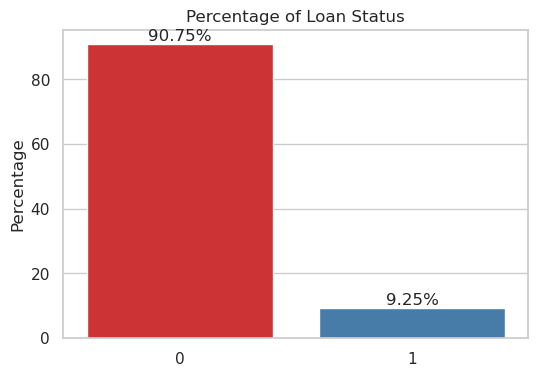

In [136]:
print(df.shape[0])

# Assuming 'df' is your DataFrame and 'Loan Status' is the column
counts = df['Loan Status'].value_counts()
total_count = len(df)

percentages = counts / total_count * 100

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=percentages.index, y=percentages.values, palette='Set1')
plt.ylabel('Percentage')
plt.title('Percentage of Loan Status')

# Display the percentages on top of the bars
for index, value in enumerate(percentages.values):
    plt.text(index, value + 0.2, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

# Data PreProcessing

In [137]:
#anova relationship between columns and target
def FunctionAnova (inpData, TargetVar, PredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors=[]  # empty list of final selected predictors
    print('##### ANOVA Results ##### \n')
    for predictor in PredictorList:
        CategoryGroupLists=inpData.groupby(TargetVar)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        # If the ANOVA P-Value is < 0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVar, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVar, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)


##ANOVA TESTING -> usar apenas dados numéricos
numeric_data = df.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_data.remove('Loan Status')


##print(numeric_data)
SelectedPredictors = FunctionAnova(df, 'Loan Status', numeric_data)

print(f"Selected Prdictors: {SelectedPredictors}")



##### ANOVA Results ##### 

Loan Amount is NOT correlated with Loan Status | P-Value: 0.24532743370121238
Funded Amount is NOT correlated with Loan Status | P-Value: 0.7231120961020374
Funded Amount Investor is NOT correlated with Loan Status | P-Value: 0.9811486184162733
Term is NOT correlated with Loan Status | P-Value: 0.37582542132472074
Interest Rate is NOT correlated with Loan Status | P-Value: 0.4513394637979872
Employment Duration is NOT correlated with Loan Status | P-Value: 0.3344917102292555
Debit to Income is NOT correlated with Loan Status | P-Value: 0.42714577391898256
Delinquency - two years is correlated with Loan Status | P-Value: 0.009462634922992178
Inquires - six months is NOT correlated with Loan Status | P-Value: 0.8806176446325595
Open Account is NOT correlated with Loan Status | P-Value: 0.06620701987720404
Public Record is correlated with Loan Status | P-Value: 0.005946386493849328
Revolving Balance is NOT correlated with Loan Status | P-Value: 0.78043535653288

In [138]:
##Chi-square test --> dados categóricos
def chi_square_test(data, target_column):
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    #categorical_columns.remove(target_column)  # Remove the target variable
    
    significant_vars = []
    print(categorical_columns)
    print("Chi-Square Test Results\n")

    for column in categorical_columns:
        # Create a contingency table
        contingency_table = pd.crosstab(data[column], data[target_column])
        
        # Apply the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Print the results
        print(f"{column} vs {target_column}")
        print(f"Chi2 value: {chi2}, P-value: {p}\n")

        # If p-value is < 0.05, consider it as significant
        if p < 0.05:
            significant_vars.append(column)
            
    return significant_vars

# Use the function
significant_predictors = chi_square_test(df, 'Loan Status')
print("Significantly associated variables with Status:", significant_predictors)

['Batch Enrolled', 'Grade', 'Sub Grade', 'Home Ownership', 'Verification Status', 'Loan Title', 'Initial List Status', 'Application Type']
Chi-Square Test Results

Batch Enrolled vs Loan Status
Chi2 value: 40.33203503167361, P-value: 0.4555732749097418

Grade vs Loan Status
Chi2 value: 14.024785837884542, P-value: 0.0293605144624493

Sub Grade vs Loan Status
Chi2 value: 33.22818832002119, P-value: 0.5052675609219769

Home Ownership vs Loan Status
Chi2 value: 16.101583241640988, P-value: 0.000318849414713897

Verification Status vs Loan Status
Chi2 value: 0.6606479264176166, P-value: 0.718690866314581

Loan Title vs Loan Status
Chi2 value: 126.9083832920198, P-value: 0.1032824198045893

Initial List Status vs Loan Status
Chi2 value: 12.101443058821943, P-value: 0.0005038281525924869

Application Type vs Loan Status
Chi2 value: 0.0, P-value: 1.0

Significantly associated variables with Status: ['Grade', 'Home Ownership', 'Initial List Status']


In [139]:
#grade seems to be correlated to "Loan Status", so let's check if subgrade is correlated with grade
# Create a contingency table
contingency_table = pd.crosstab(df['Grade'], df['Sub Grade'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 736.1805835653637, p-value: 2.9253049030321995e-61


### Sub grade e Grade estão correlecaionadas, logo apesar de sub Grade não ter correlação com "Loan Status", teremos que a manter

In [140]:
#let's make sure we keep the important columns in a list so we can use later on

columns_to_keep = SelectedPredictors + significant_predictors
columns_to_keep.append("Sub Grade")
print(columns_to_keep)

['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Grade', 'Home Ownership', 'Initial List Status', 'Sub Grade']


# Optimizations

## In following code blocks, possible optimizations will be done to try and boost the models' performance

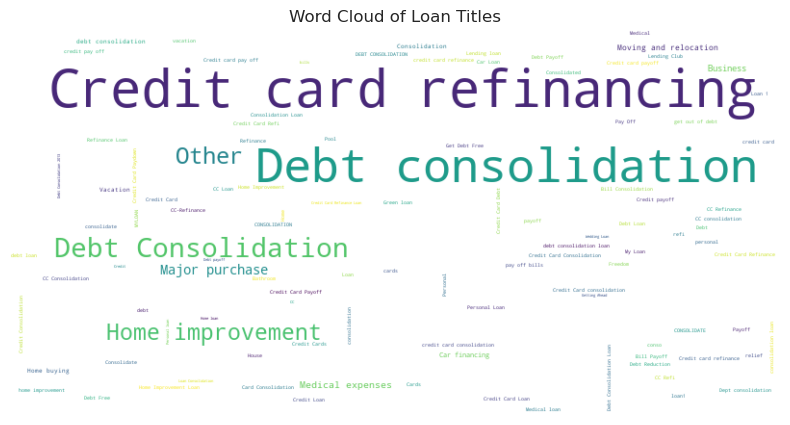

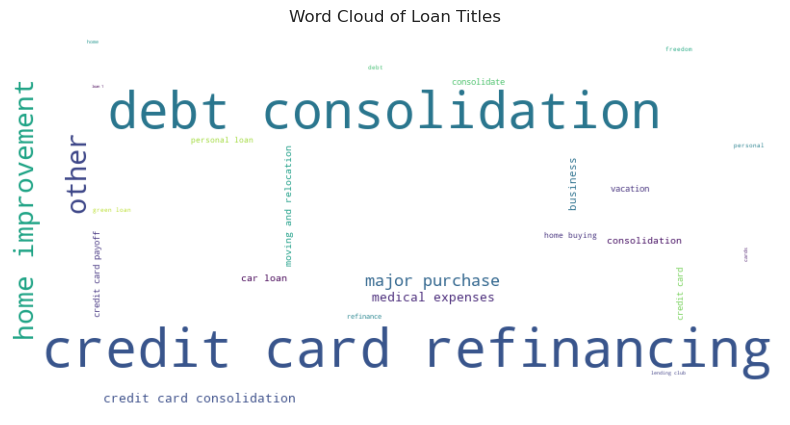

In [141]:
#Loan title has many words/terms that are the same, but in some the first letter is in upper-case and in others it is in lower-case
#or it has many diferent words/expressions that essentily mean the same thing
#to fix this let's just convert everyting to lower-case
#let's do a before and after to see the changes

#before:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['Loan Title'].value_counts())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Loan Titles')
plt.show()



#let's apply some trnsformations to the title column
df['Loan Title'] = df['Loan Title'].str.lower().str.strip()
# print(df['Loan Title'].unique())


title_mapping = {
    'debt consolidation': 'debt consolidation',
    'credit card refinancing': 'credit card refinancing',
    'credit consolidation': 'credit card consolidation',
    'refinance': 'refinance',
    'home improvement': 'home improvement',
    'medical expenses': 'medical expenses',
    'credit cards': 'credit card',
    'other': 'other',
    'major purchase': 'major purchase',
    'personal loan': 'personal loan',
    'business': 'business',
    'green loan': 'green loan',
    'home buying': 'home buying',
    'moving and relocation': 'moving and relocation',
    'get out of debt': 'debt consolidation',
    'consolidation loan': 'debt consolidation',
    'dept consolidation': 'debt consolidation',
    'bathroom': 'home improvement',
    'credit card debt': 'credit card consolidation',
    'house': 'home',
    'vacation': 'vacation',
    'debt loan': 'debt consolidation',
    'cc consolidation': 'credit card consolidation',
    'credit card refinance': 'credit card refinancing',
    'car financing': 'car loan',
    'bill consolidation': 'debt consolidation',
    'credit card pay off': 'credit card payoff',
    'cc refinance': 'credit card refinancing',
    'credit card': 'credit card',
    'debt consolidation loan': 'debt consolidation',
    'payoff': 'debt consolidation',
    'my loan': 'other',
    'loan': 'other',
    'debt consolidation 2013': 'debt consolidation',
    'bill payoff': 'debt consolidation',
    'medical loan': 'medical expenses',
    'wedding loan': 'wedding loan',
    'credit card payoff': 'credit card payoff',
    'refinance loan': 'refinance',
    'car loan': 'car loan',
    'credit card loan': 'credit card consolidation',
    'pool': 'other',
    'medical': 'medical expenses',
    'credit loan': 'credit card',
    'credit payoff': 'credit card payoff',
    'credit card paydown': 'credit card payoff',
    'get debt free': 'debt consolidation',
    'cc loan': 'credit card',
    'conso': 'debt consolidation',
    'home improvement loan': 'home improvement',
    'card consolidation': 'credit card consolidation',
    'refi': 'refinance',
    'debt payoff': 'debt consolidation',
    'cc-refinance': 'credit card refinancing',
    'debt free': 'debt consolidation',
    'lending loan': 'lending loan',
    'cc': 'credit card',
    'pay off bills': 'debt consolidation',
    'pay off': 'debt consolidation',
    'myloan': 'other',
    'relief': 'debt consolidation',
    'getting ahead': 'other',
    'credit pay off': 'credit card payoff',
    'debt reduction': 'debt consolidation',
    'loan1': 'other',
    'credit': 'credit card',
    'home loan': 'home loan',
    'bills': 'debt consolidation',
    'credit card refinance loan': 'credit card refinancing',
    'loan consolidation': 'other',
}


#Let's update the titles to their respective new category
df['Loan Title'] = df['Loan Title'].map(title_mapping).fillna(df['Loan Title'])






wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['Loan Title'].value_counts())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Loan Titles')
plt.show()

In [142]:
print(df['Loan Title'].nunique())

32


In [143]:
#if i want to drop additional columns

In [144]:
#let's check for null values
#if they exist, we must handle them
null_values_df = df.isnull().sum()
if (null_values_df.sum() == 0):
    print('There are no NULL values in the dataframe!')
else:
    print('The dataframe contains NULL values!')


#let's check for NaN values
#if they exist, we must handle them
NaN_values_df = df.isna().sum()
if (NaN_values_df.sum() == 0):
    print('There are no NaN values in the dataframe!')
else:
    print('The dataframe contains NaN values!')


#let's check for duplicates and if there are any, let's drop them
#let's print it's size before and after the drop_duplicates
before_duplicates_drop = df.size
df.drop_duplicates(inplace=True) #the inplace =True, ensures the changes are aplied tot eh variable and don't need to call/create a new one or another reference
if (df.size == before_duplicates_drop):
    print('There were no duplicates in the dataframe')
else:
    print('The dataframe had duplicates and they were removed')




There are no NULL values in the dataframe!
There are no NaN values in the dataframe!
There were no duplicates in the dataframe


In [145]:
#Let's handle outliers through statistical methods

# these columns are worth handling outliers
columns_outliers_remove = ['Employment Duration', 'Interest Rate', 'Inquires - six months', 'Total Accounts',
               'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 
               'Collection Recovery Fee', 'Collection 12 months Medical', 
               'Total Collection Amount', 'Total Revolving Credit Limit']




outliers_removed_info = {}

for column in columns_outliers_remove:
    # IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers_iqr = df.loc[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)), column]

    # Store information about outliers in the dictionary
    outliers_removed_info[column] = {
        'outliers_count': outliers_iqr.size,
        'outliers_values': outliers_iqr.tolist()
    }

    # Remove outliers from the dataframe
    df = df.loc[~df.index.isin(outliers_iqr.index)]

# Print information about outliers removed for each column
for column, info in outliers_removed_info.items():
    if info['outliers_count'] == 0:
        continue
    print(f"Outliers for {column} using IQR method ({info['outliers_count']})\n")



Outliers for Employment Duration using IQR method (4115)

Outliers for Interest Rate using IQR method (793)

Outliers for Inquires - six months using IQR method (6436)

Outliers for Total Accounts using IQR method (1147)

Outliers for Total Received Interest using IQR method (4026)

Outliers for Total Received Late Fee using IQR method (2502)

Outliers for Recoveries using IQR method (1578)

Outliers for Collection Recovery Fee using IQR method (546)

Outliers for Collection 12 months Medical using IQR method (973)

Outliers for Total Collection Amount using IQR method (3108)

Outliers for Total Revolving Credit Limit using IQR method (1659)



In [146]:
# lets's remove the rows in which application type == Joint
# only 0.2% are joint, so let's remove them as they are outliers 
df= df[df['Application Type'] != 'Joint']

40580


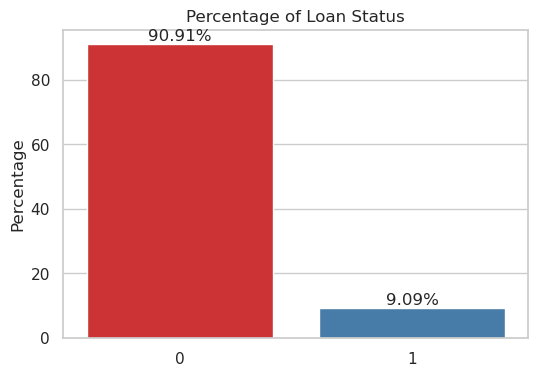

In [147]:
print(df.shape[0])

# Assuming 'df' is your DataFrame and 'Loan Status' is the column
counts = df['Loan Status'].value_counts()
total_count = len(df)

percentages = counts / total_count * 100

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=percentages.index, y=percentages.values, palette='Set1')
plt.ylabel('Percentage')
plt.title('Percentage of Loan Status')

# Display the percentages on top of the bars
for index, value in enumerate(percentages.values):
    plt.text(index, value + 0.2, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

In [148]:
#Now that we have dealt with outliers, let's check if there are any columns with 1 unique value only.
#if so, let's drop them

columns_to_drop = []

for col in df.columns.to_list():
    if df[col].nunique() == 1:
        columns_to_drop.append(col)

if len(columns_to_drop) > 0:
    print(f"Columns dropped: {columns_to_drop}")
    df = df.drop(columns_to_drop, axis=1)
else:
    print('No columns were dropped!')

Columns dropped: ['Inquires - six months', 'Collection 12 months Medical']


In [149]:
#let's update this list, as some columns were removed
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [150]:
df_columns_list = df.columns.to_list()
df_columns_list.remove('Loan Status')
#df_columns_list.remove('Sub Grade')

In [151]:
# This will be used to make modifications to the dataframe, in hopes it improves the models' performance
for col in df_columns_list:
    if col not in columns_to_keep:
        df.drop(col, axis=1, inplace=True)

print(columns_to_keep)

['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Grade', 'Home Ownership', 'Initial List Status', 'Sub Grade']


In [152]:
#let's perform one-hot encoding on categorical variables
#for varibales in which the possible values are just 2 (binary), we don't have to create new columns

#from the categorical columns, let's check which ones are binary:
binary_columns = []
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()


for col in categorical_cols:
    #print(f"{col} has this amount of unique values: {df[col].nunique()}")
    if df[col].nunique() == 2:
        binary_columns.append(col)

for col in binary_columns:
    if col in categorical_cols:
        categorical_cols.remove(col)

print(binary_columns)
print(categorical_cols)




['Initial List Status']
['Grade', 'Sub Grade', 'Home Ownership']


In [153]:
#let's encode the binary columns:

# Assuming df is your DataFrame
label_encoder = LabelEncoder()

for column in binary_columns:
    df[column] = label_encoder.fit_transform(df[column])

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()


#Let's encode the categorical columns that are not binary
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=True)





In [154]:
print(df_encoded.shape[0])

40580


In [155]:
#let's build a correlation matrix between all variables and the target variable (Loan Status)




# target_variable = 'Loan Status'

# correlation_matrix = df_encoded.corr()

# # Plot a heatmap of the correlation matrix
# plt.figure(figsize=(100, 80))  # Increase the figure size
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
# plt.title(f'Correlation Matrix (Target Variable: {target_variable})', fontsize=16)  # Increase title font size
# plt.show()


#doesn't give us much information :/


# Creation of models using data mining algorithms;

In [156]:
print(df_encoded.shape[1])
print(df_encoded.shape[0])

49
40580


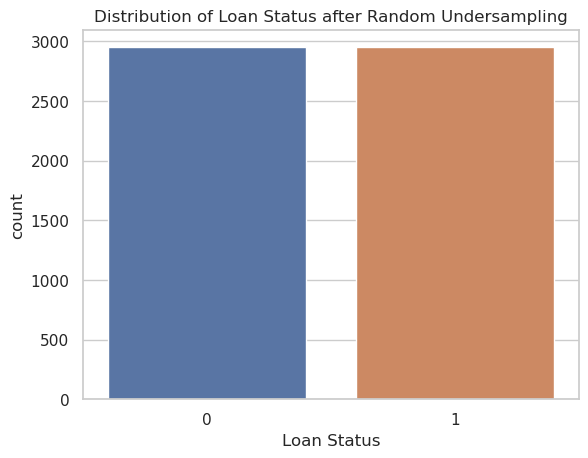

In [157]:
# Separate features and target variable
X = df_encoded.drop('Loan Status', axis=1)
y = df_encoded['Loan Status']


#undersampler = RandomUnderSampler(random_state = 42)
undersampler = NearMiss(sampling_strategy='auto')

# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X, y = smote.fit_resample(X, y)




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)

X_train, y_train = undersampler.fit_resample(X_train, y_train)


##Min-Max Normalization
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# #Apply random undersampling to the training set
# undersampler = RandomUnderSampler(random_state = 42)
# X_train, y_train = undersampler.fit_resample(X_train, y_train)

# Assuming y_train is the target variable after random undersampling
sns.countplot(x='Loan Status', data=pd.DataFrame({'Loan Status': y_train}))
plt.title('Distribution of Loan Status after Random Undersampling')
plt.show()


/home/joao/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/joao/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/joao/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/joao/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/jo

<Figure size 1200x800 with 0 Axes>

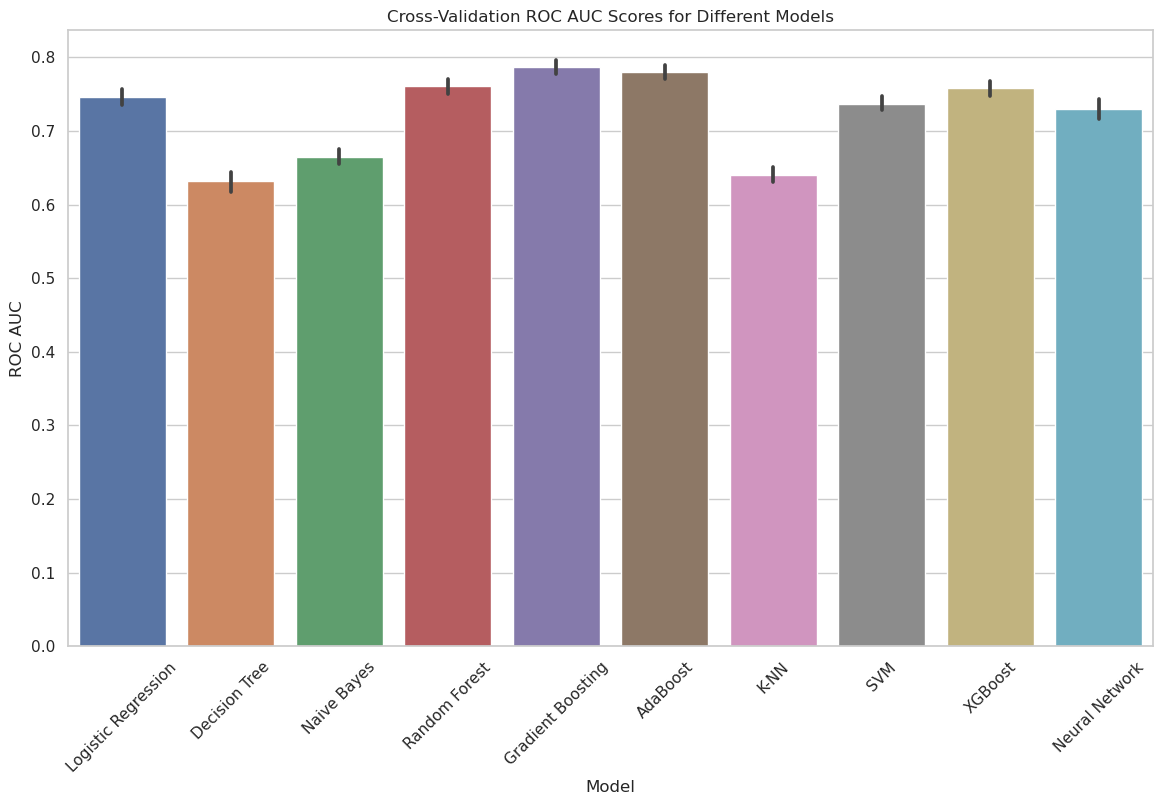

In [158]:
# Define a function to create your Keras model
def create_neural_network():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use KerasClassifier to wrap your Keras model
keras_model = KerasClassifier(build_fn=create_neural_network, epochs=10, batch_size=32, verbose=0)

#Set up the figure and axis
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Define models including the Keras model
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("K-NN", KNeighborsClassifier(n_neighbors=49)),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier()),
    ("Neural Network", keras_model)
]

# Lists to store model names and corresponding cross-validation scores
model_names = []
cv_scores_list = []
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)


# Perform cross-validation for each model
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='roc_auc')
    model_names.extend([name] * len(scores))
    cv_scores_list.extend(scores)

# Create a DataFrame for plotting
df_scores = pd.DataFrame({'Model': model_names, 'ROC AUC': cv_scores_list})

# Create a barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='ROC AUC', data=df_scores)
plt.title('Cross-Validation ROC AUC Scores for Different Models')
plt.xticks(rotation=45)
plt.show()


In [159]:
# Logistic regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)





# Optimized logistic regression with GridSearchCV
logistic_model_optimized = LogisticRegression(max_iter=1000, random_state=42)

# Choose the Cross-Validation Method
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for logistic regression
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Instantiate GridSearchCV for logistic regression
grid_search_logistic = GridSearchCV(logistic_model_optimized, param_grid_logistic, cv=k_fold, scoring='accuracy', n_jobs=-1)
grid_search_logistic.fit(X_train, y_train)

# Get the best hyperparameters
best_params_logistic = grid_search_logistic.best_params_

# Use the best parameters to train the final model
logistic_model_optimized = LogisticRegression(max_iter=1000, random_state=42, **best_params_logistic)
logistic_model_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic_optimized = logistic_model_optimized.predict(X_test)


In [160]:
#Decision trees
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
y_pred_decision = decision_tree_classifier.predict(X_test)


In [161]:
#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)




#-------------------------------------------

# Define the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Choose the Cross-Validation Method
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for Gaussian Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Instantiate GridSearchCV for Gaussian Naive Bayes
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=k_fold, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_nb = grid_search_nb.best_params_

# Use the best parameters to train the final model
nb_model_optimized = GaussianNB(**best_params_nb)
nb_model_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb_optimized = nb_model_optimized.predict(X_test)


In [162]:
#Random forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [163]:
#Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

In [164]:
#AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

In [165]:
#K-NN

knn_model = KNeighborsClassifier(n_neighbors=49)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


# # Create an array to store accuracy scores for each number of neighbors
# accuracy_scores = []

# # Define a range of neighbors (1-15)
# neighbors_range = range(1, 50, 2)

# #Loop through different numbers of neighbors
# for k in neighbors_range:
#     #Create and fit the k-NN model with current k
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(X_train, y_train)
    
#    # Predict on the test set
#     y_pred_knn = knn_model.predict(X_test)
    
#     #Calculate accuracy and store it in the array
#     accuracy = accuracy_score(y_test, y_pred_knn)
#     accuracy_scores.append(accuracy)

# # Visualize the results with a bar plot
# plt.figure(figsize=(38, 38))
# plt.bar(neighbors_range, accuracy_scores, color='blue', alpha=0.7)
# plt.title('k-NN Accuracy for Different Numbers of Neighbors')
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Accuracy')
# plt.xticks(neighbors_range)

# # Add text annotations on top of each bar
# for i, accuracy in enumerate(accuracy_scores):
#     plt.text(neighbors_range[i], accuracy, f'{accuracy:.3f}', ha='center', va='bottom')

# plt.show()

In [166]:
#SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [167]:
#Lightgbm
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 2951, number of negative: 2951
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 5902, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [168]:
#Catboost
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

In [169]:
#XGBoost
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)

In [170]:
#Bagging classifier
base_classifier = DecisionTreeClassifier()

bagging = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
#bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

y_pred_bagging = bagging.predict(X_test)

In [171]:
#Neural Networks
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Use EarlyStopping to prevent overfittings
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predict using the neural network
y_pred_nn_probs = nn_model.predict(X_test).flatten()
# Apply a threshold (e.g., 0.5) to convert probabilities to binary labels
y_pred_nn = (y_pred_nn_probs > 0.5).astype(int)


Epoch 1/20
148/148 [==============================] - 1s 4ms/step - loss: 0.6300 - accuracy: 0.6749 - val_loss: 0.8315 - val_accuracy: 0.3700
Epoch 2/20
148/148 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.7198 - val_loss: 0.7632 - val_accuracy: 0.4776
Epoch 3/20
148/148 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7348 - val_loss: 0.7210 - val_accuracy: 0.5114
Epoch 4/20
148/148 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.7424 - val_loss: 0.7732 - val_accuracy: 0.4920
Epoch 5/20
148/148 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7416 - val_loss: 0.8392 - val_accuracy: 0.4649
Epoch 6/20
254/254 [==============================] - 0s 2ms/step


In [172]:
#let's apply some ensemble learning techniques
from sklearn.ensemble import VotingClassifier
# List of models
models = [
    ("Linear Algorithm: Logistic Regression", logistic_model),
    ("Tree-Based Model: Decision Tree", decision_tree_classifier),
    ("Probabilistic Model: Naive Bayes", nb_model),
    ("Boosting Algorithm: Gradient Boosting", gradient_boosting_model),
    ("Instance-Based Learning: K-NN", knn_model)
]

# Create a VotingClassifier with hard voting
voting_classifier = VotingClassifier(estimators=models, voting='hard')

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = voting_classifier.predict(X_test)


In [173]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create a stacking classifier
stacking_classifier = StackingClassifier(estimators=models, final_estimator=LogisticRegression())

# Train the stacking model
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluation of the models created.

In [174]:
# Evaluate the models

print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))
acc_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {acc_logistic:.4f}\n")


print("Logistic Regression(Optimized):")
print(classification_report(y_test, y_pred_logistic_optimized))
print(confusion_matrix(y_test, y_pred_logistic_optimized))
acc_logistic = accuracy_score(y_test, y_pred_logistic_optimized)
print(f"Accuracy: {acc_logistic:.4f}\n")

print("Decision Tree:")
print(classification_report(y_test, y_pred_decision))
print(confusion_matrix(y_test, y_pred_decision))
decision_tree = accuracy_score(y_test, y_pred_decision)
print(f"Accuracy: {decision_tree:.4f}\n")

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {acc_nb:.4f}\n")

print("Naive Bayes(Optimized):")
print(classification_report(y_test, y_pred_nb_optimized))
print(confusion_matrix(y_test, y_pred_nb_optimized))
acc_nb = accuracy_score(y_test, y_pred_nb_optimized)
print(f"Accuracy: {acc_nb:.4f}\n")

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {acc_rf:.4f}\n")

print("\nGradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {acc_gb:.4f}\n")

print("\nAdaBoost:")
print(classification_report(y_test, y_pred_adaboost))
print(confusion_matrix(y_test, y_pred_adaboost))
acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy: {acc_adaboost:.4f}\n")

print("\nK-NN:")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {acc_knn:.4f}\n")

print("\nSVM:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {acc_svm:.4f}\n")

print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgboost))
print(confusion_matrix(y_test, y_pred_xgboost))
acc_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"Accuracy: {acc_xgboost:.4f}\n")

print("\nLightGBM:")
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy: {acc_lgbm:.4f}\n")

print("\nCatBoost:")
print(classification_report(y_test, y_pred_catboost))
print(confusion_matrix(y_test, y_pred_catboost))
acc_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"Accuracy: {acc_catboost:.4f}\n")

print("\nBagging:")
print(classification_report(y_test, y_pred_bagging))
print(confusion_matrix(y_test, y_pred_bagging))
acc_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy: {acc_bagging:.4f}\n")


print("\nNeural Network:")
print(classification_report(y_test, y_pred_nn))
print(confusion_matrix(y_test, y_pred_nn))
acc_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {acc_nn:.4f}\n")

print("\nVoting Classifier:")
print(classification_report(y_test, y_pred_ensemble))
print(confusion_matrix(y_test, y_pred_ensemble))
acc_nn = accuracy_score(y_test, y_pred_ensemble)
print(f"Accuracy: {acc_nn:.4f}\n")

print("\nStacking Classifier:")
print(classification_report(y_test, y_pred_stacking))
print(confusion_matrix(y_test, y_pred_stacking))
acc_nn = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy: {acc_nn:.4f}\n")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.44      0.59      7378
           1       0.09      0.57      0.16       738

    accuracy                           0.45      8116
   macro avg       0.50      0.50      0.38      8116
weighted avg       0.84      0.45      0.55      8116

[[3237 4141]
 [ 318  420]]
Accuracy: 0.4506

Logistic Regression(Optimized):
              precision    recall  f1-score   support

           0       0.91      0.44      0.59      7378
           1       0.09      0.57      0.16       738

    accuracy                           0.45      8116
   macro avg       0.50      0.50      0.38      8116
weighted avg       0.84      0.45      0.55      8116

[[3237 4141]
 [ 318  420]]
Accuracy: 0.4506

Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.33      0.49      7378
           1       0.09      0.67      0.16       738

    accuracy            

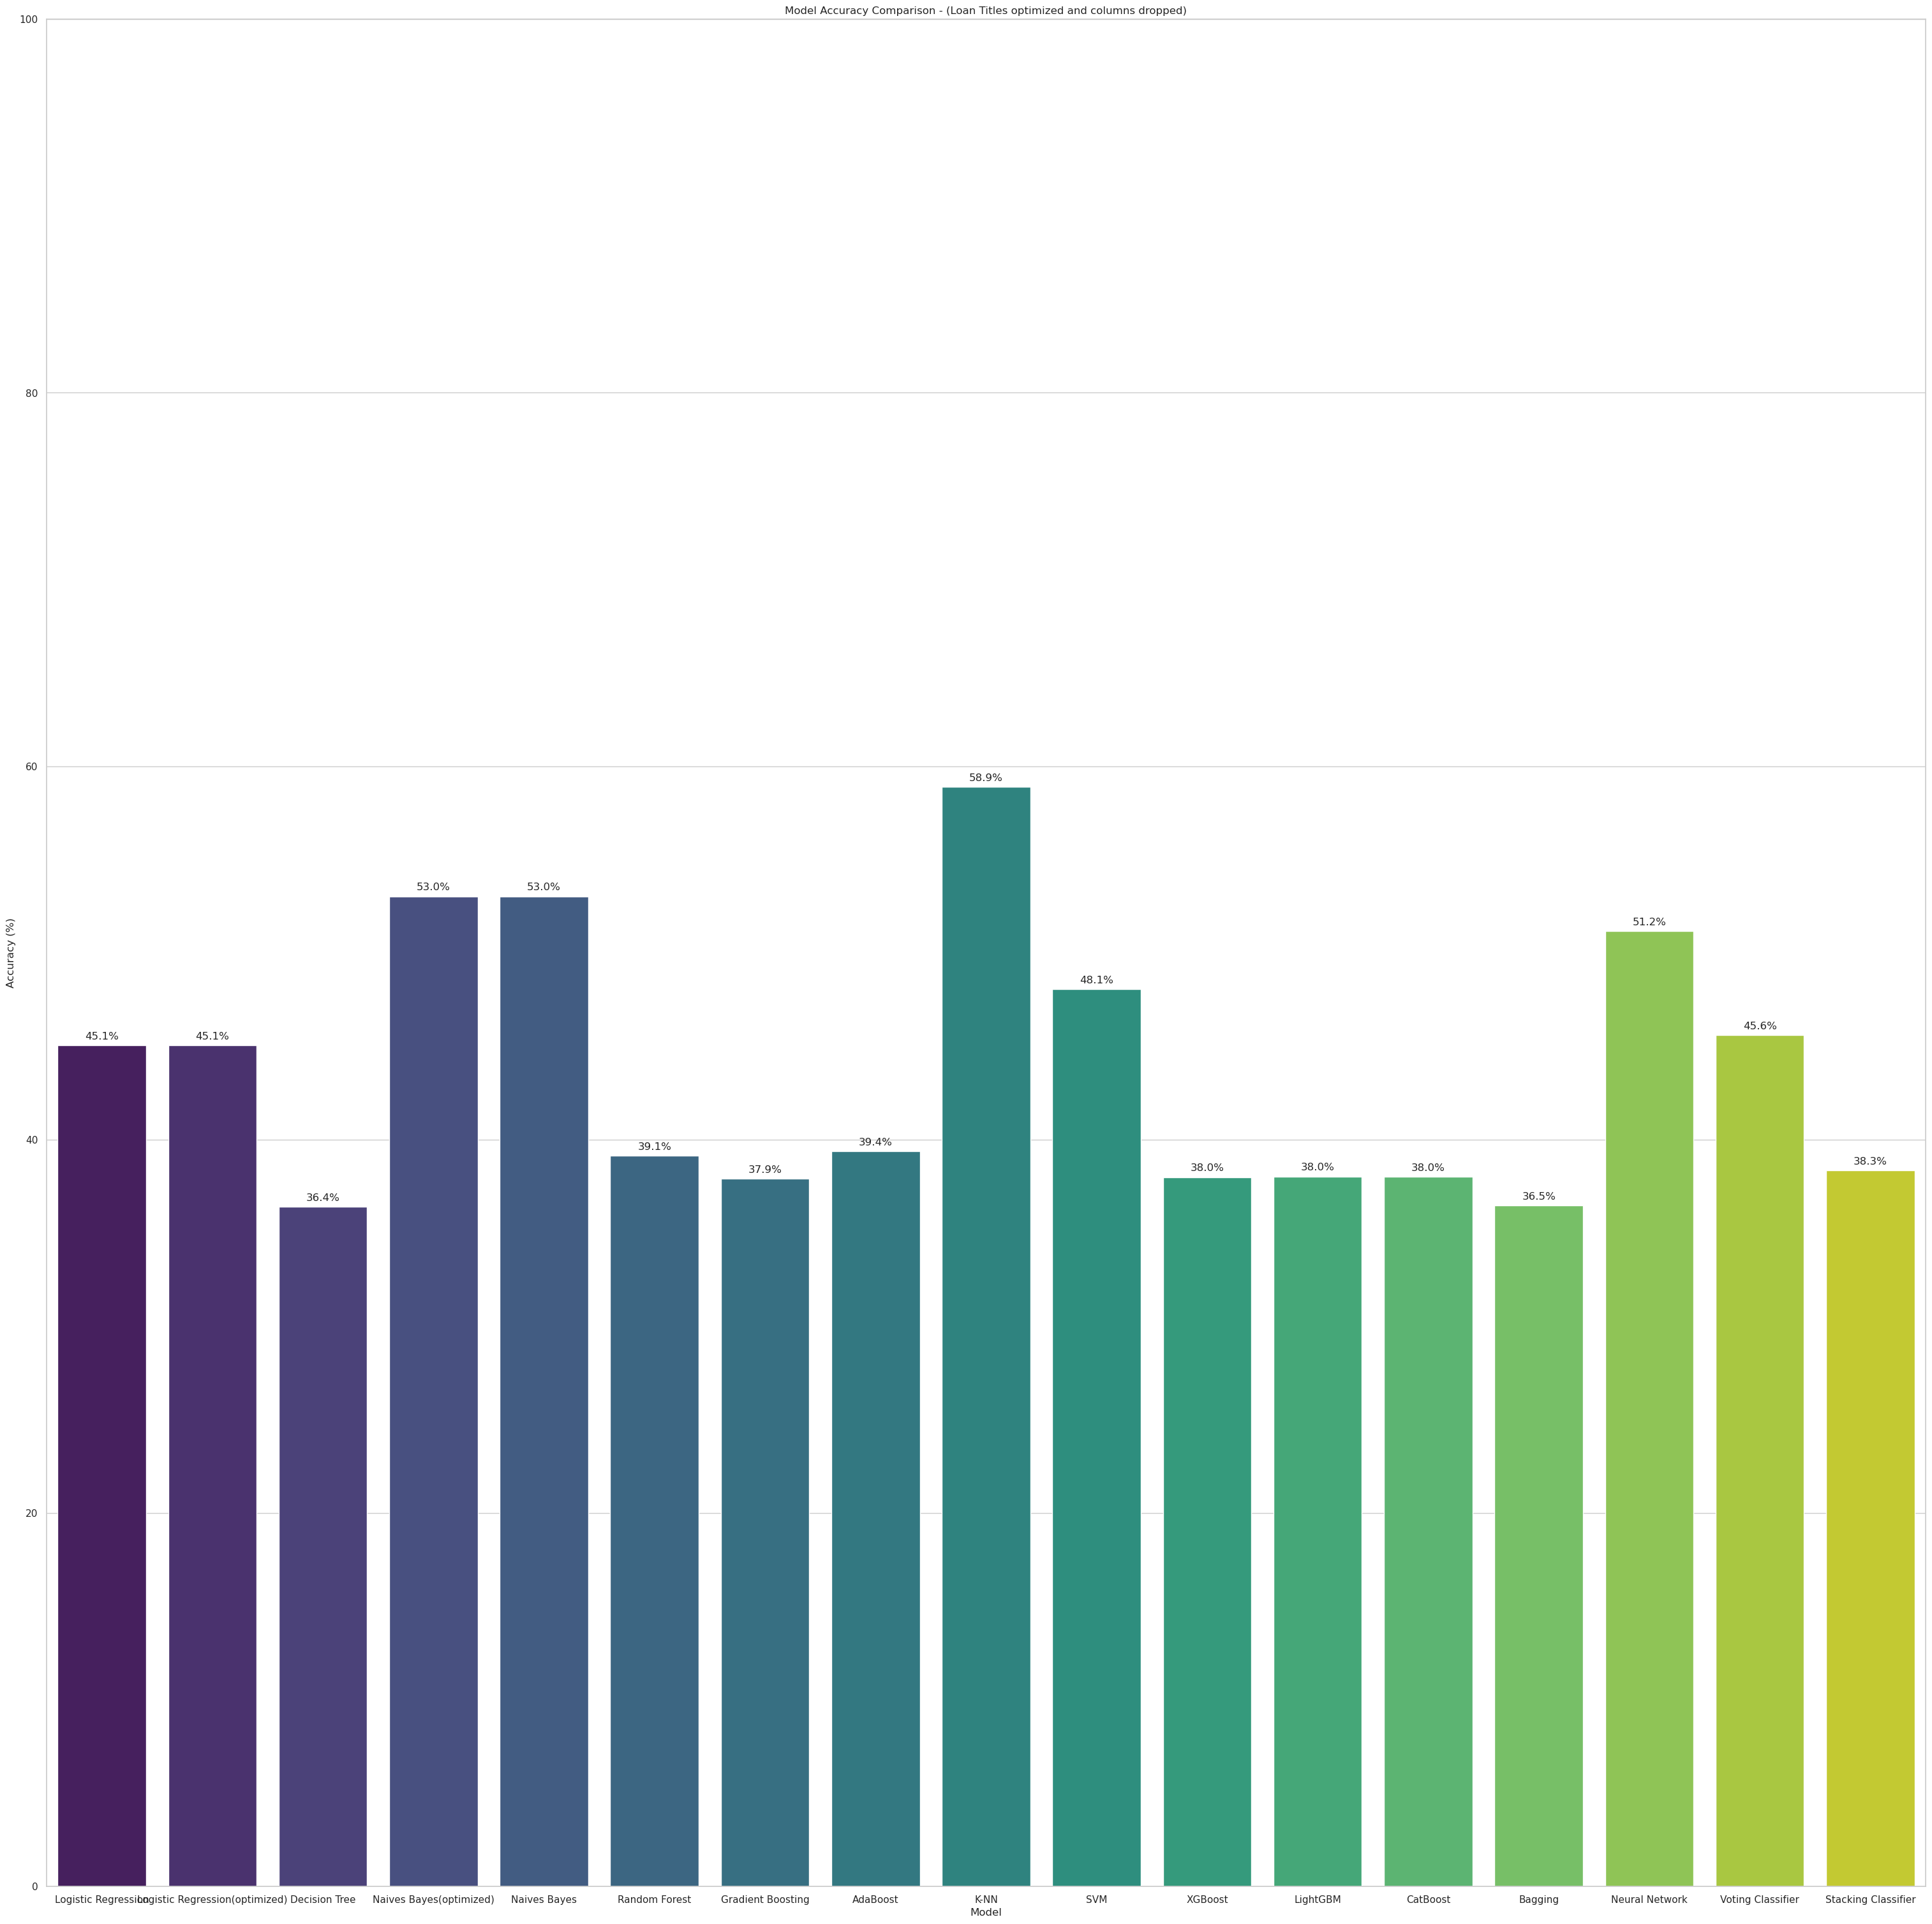

In [175]:
#let's plot the accuracy of each algorithm

# Assuming you have the models and their predictions
models = [
    ("Logistic Regression", y_pred_logistic),
    ("Logistic Regression(optimized)", y_pred_logistic_optimized),
    ("Decision Tree", y_pred_decision),
    ('Naives Bayes(optimized)', y_pred_nb),
    ('Naives Bayes', y_pred_nb_optimized),
    ("Random Forest", y_pred_rf),
    ("Gradient Boosting", y_pred_gb),
    ("AdaBoost", y_pred_adaboost),
    ("K-NN", y_pred_knn),
    ("SVM", y_pred_svm),
    ("XGBoost", y_pred_xgboost),
    ("LightGBM", y_pred_lgbm),
    ("CatBoost", y_pred_catboost),
    ("Bagging", y_pred_bagging),
    ("Neural Network", y_pred_nn),
    ("Voting Classifier", y_pred_ensemble),
    ("Stacking Classifier", y_pred_stacking)
]

# Collect accuracy scores (normalized to percentages)
accuracies = [(model_name, 100 * accuracy_score(y_test, y_pred)) for model_name, y_pred in models]

# Plotting
plt.figure(figsize=(38, 38))
ax = sns.barplot(x=[model_name for model_name, _ in accuracies], y=[accuracy for _, accuracy in accuracies], palette="viridis")
plt.title("Model Accuracy Comparison - (Loan Titles optimized and columns dropped)")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")  # Update y-axis label
plt.ylim(0, 100)  # Set y-axis limit to be between 0 and 100

# Annotate each bar with the percentage
total_counts = len(y_test)
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


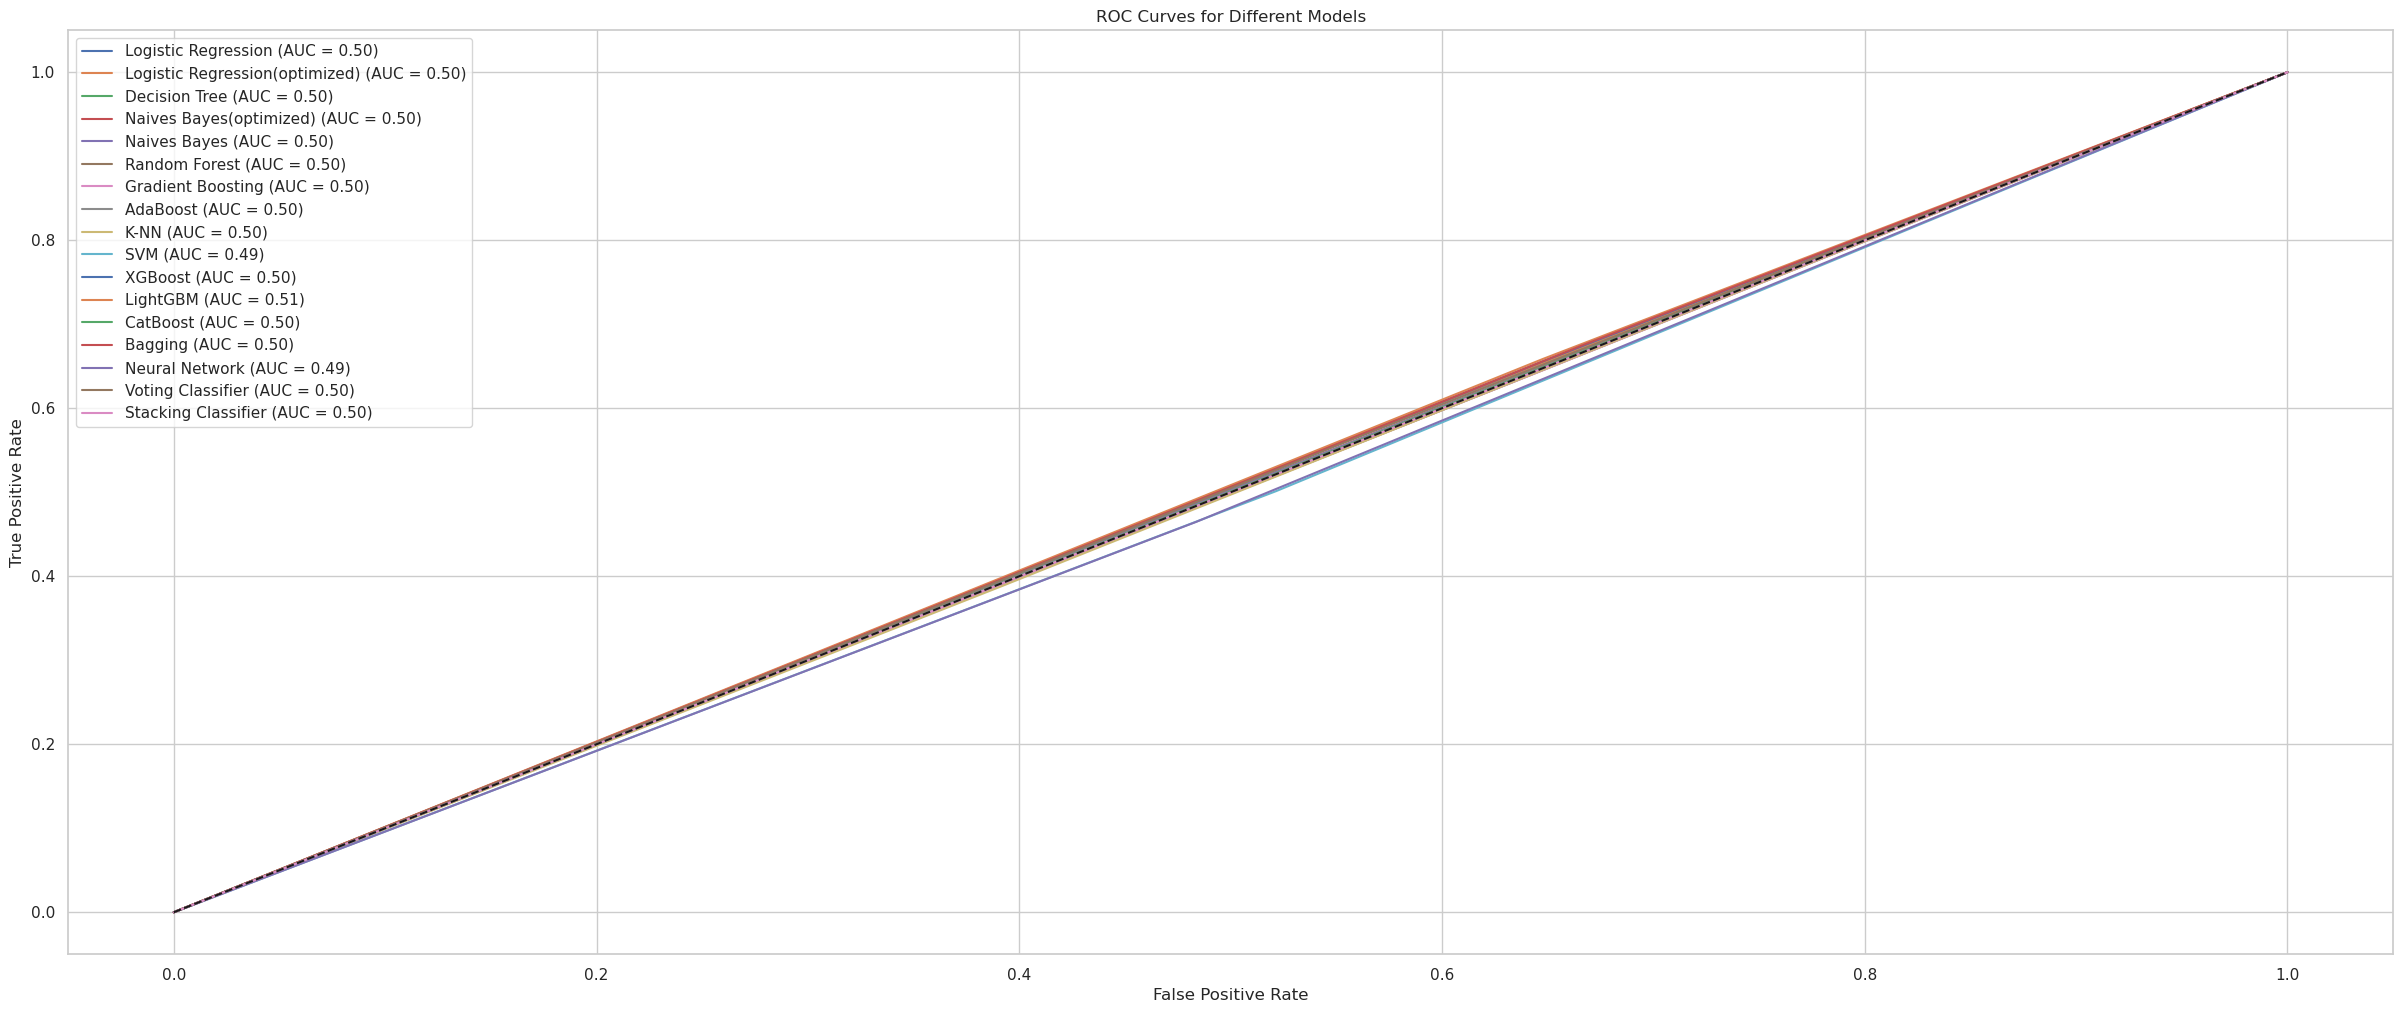

In [176]:

models = [
    ("Logistic Regression", y_pred_logistic),
    ("Logistic Regression(optimized)", y_pred_logistic_optimized),
    ("Decision Tree", y_pred_decision),
    ('Naives Bayes(optimized)', y_pred_nb),
    ('Naives Bayes', y_pred_nb_optimized),
    ("Random Forest", y_pred_rf),
    ("Gradient Boosting", y_pred_gb),
    ("AdaBoost", y_pred_adaboost),
    ("K-NN", y_pred_knn),
    ("SVM", y_pred_svm),
    ("XGBoost", y_pred_xgboost),
    ("LightGBM", y_pred_lgbm),
    ("CatBoost", y_pred_catboost),
    ("Bagging", y_pred_bagging),
    ("Neural Network", y_pred_nn),
    ("Voting Classifier", y_pred_ensemble),
    ("Stacking Classifier", y_pred_stacking)
]

# Plot ROC curves for each model
plt.figure(figsize=(30, 12))
for model_name, y_pred in models:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()